# **Google and Tiktok Search Data Analysis** #

## Importing Necessary Libraries ##

In [1]:
import pandas as pd
import numpy as np
from matplotlib_venn import venn2
import matplotlib.pyplot as plt
from IPython.display import display
import seaborn as sns

### Load the Google & Tiktok Search Result ###

In [79]:
# Load the Google search results
google_df=google_search_results = pd.read_csv('google_Search_Results.csv')
# Load the TikTok search results
tiktok_df=tiktok_search_results = pd.read_csv('Tiktok search Results_trtl.csv')
google_df.head(),tiktok_df.head()

(  keyword  Position                                              title  \
 0    trtl         1                 Trtl Travel (@trtltravel) Official   
 1    trtl         2                                        Trtl Pillow   
 2    trtl         3  trtltravelpillow is scientifically proven to k...   
 3    trtl         4                                   trtltravelpillow   
 4    trtl         5                                 Trtl Pillow Review   
 
                                                  URL Account Type Time period  
 0                 https://www.tiktok.com/@trtltravel       Google  04/07/2024  
 1        https://www.tiktok.com/discover/trtl-pillow       Google  04/07/2024  
 2  https://www.tiktok.com/@raz_856/video/73859117...       Google  04/07/2024  
 3  https://www.tiktok.com/discover/Trtl-travel-pi...       Google  04/07/2024  
 4  https://www.tiktok.com/discover/trtl-pillow-re...       Google  04/07/2024  ,
   Keyword                                      Search result

#### Data Cleaning and Normalization ####

In [81]:
#Setting up the appropriate column names and datatypes
#Normalize column names
google_search_results.columns = ['Keyword', 'Position', 'Title', 'URL', 'Account_Type', 'Time_Period']
tiktok_search_results.columns = ['Keyword', 'Search_Result', 'Position', 'URL', 'Account_Type', 'Time_Period']
#convert Position columns to integers
google_search_results['Position']=google_search_results['Position'].astype(int,errors='ignore')
tiktok_search_results['Position']=tiktok_search_results['Position'].astype(int,errors='ignore')
#Normalizng/Converting URLs to lower case
google_urls=google_search_results['URL'].dropna().str.lower()
tiktok_urls=tiktok_search_results['URL'].dropna().str.lower()
google_search_results.head(),tiktok_search_results.head()

(  Keyword  Position                                              Title  \
 0    trtl         1                 Trtl Travel (@trtltravel) Official   
 1    trtl         2                                        Trtl Pillow   
 2    trtl         3  trtltravelpillow is scientifically proven to k...   
 3    trtl         4                                   trtltravelpillow   
 4    trtl         5                                 Trtl Pillow Review   
 
                                                  URL Account_Type Time_Period  
 0                 https://www.tiktok.com/@trtltravel       Google  04/07/2024  
 1        https://www.tiktok.com/discover/trtl-pillow       Google  04/07/2024  
 2  https://www.tiktok.com/@raz_856/video/73859117...       Google  04/07/2024  
 3  https://www.tiktok.com/discover/Trtl-travel-pi...       Google  04/07/2024  
 4  https://www.tiktok.com/discover/trtl-pillow-re...       Google  04/07/2024  ,
   Keyword                                      Search_Result

 #### Data Exploration and Statistics ####

In [4]:
#Display the Keywords in both data sets
print("\nGoogle search results column names")
print(google_search_results.columns)

print("\nTiktok search results column names")
print(tiktok_search_results.columns)



Google search results column names
Index(['Keyword', 'Position', 'Title', 'URL', 'Account_Type', 'Time_Period'], dtype='object')

Tiktok search results column names
Index(['Keyword', 'Search_Result', 'Position', 'URL', 'Account_Type',
       'Time_Period'],
      dtype='object')


In [5]:
google_search_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7425 entries, 0 to 7424
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Keyword       7425 non-null   object
 1   Position      7425 non-null   int32 
 2   Title         7425 non-null   object
 3   URL           7425 non-null   object
 4   Account_Type  7425 non-null   object
 5   Time_Period   7425 non-null   object
dtypes: int32(1), object(5)
memory usage: 319.2+ KB


In [6]:
tiktok_search_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14850 entries, 0 to 14849
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Keyword        14850 non-null  object
 1   Search_Result  14850 non-null  object
 2   Position       14850 non-null  int32 
 3   URL            14850 non-null  object
 4   Account_Type   14850 non-null  object
 5   Time_Period    14850 non-null  object
dtypes: int32(1), object(5)
memory usage: 638.2+ KB


In [7]:
print("\nGoogle Search Keywords Distribution")
print(google_search_results['Keyword'].value_counts())

print("\nTiktok Search Keywords Distribution")
print(tiktok_search_results['Keyword'].value_counts())

print("\nTikTok Account Type Distribution")
Keyword_account_type_distribution=tiktok_search_results.groupby(['Keyword','Account_Type']).size().unstack(fill_value=0)
print(Keyword_account_type_distribution)


Google Search Keywords Distribution
trtl                1485
trtl pillow         1485
trtltravelpillow    1485
trtltravel          1485
trtlneckpillow      1485
Name: Keyword, dtype: int64

Tiktok Search Keywords Distribution
trtl                2970
trtl pillow         2970
trtltravelpillow    2970
trtltravel          2970
trtlneckpillow      2970
Name: Keyword, dtype: int64

TikTok Account Type Distribution
Account_Type      Private  Public
Keyword                          
trtl                 1485    1485
trtl pillow          1485    1485
trtlneckpillow       1485    1485
trtltravel           1485    1485
trtltravelpillow     1485    1485


In [8]:
tiktok_summary=tiktok_search_results.describe()
google_summary=google_search_results.describe()
display(tiktok_summary)
display(google_summary)

Position
count  14850.000000
mean      50.000000
std       28.578343
min        1.000000
25%       25.000000
50%       50.000000
75%       75.000000
max       99.000000

Position
count  7425.000000
mean     50.000000
std      28.579305
min       1.000000
25%      25.000000
50%      50.000000
75%      75.000000
max      99.000000

## URL Analysis ##

#### URL count between Google & Tiktok(Public + Private Account Type) ####

In [9]:
# Calculate overall URL counts
overall_google_url_count = google_search_results['URL'].count()
overall_tiktok_url_count = tiktok_search_results['URL'].count()
print(overall_google_url_count,overall_tiktok_url_count)

7425 14850


#### Unique URL count between Google & Tiktok(Public + Private Account Type) ####

In [10]:
#Overall unique URL count
overall_google_url_unique_count=google_search_results['URL'].nunique()
overall_tiktok_url_unique_count=tiktok_search_results['URL'].nunique()
print(overall_google_url_unique_count,overall_tiktok_url_unique_count)

343 744


#### URL count between Tiktok Public Account Type and Private Account ####

In [11]:
# Calculate overall TikTok private and public account type URL counts
overall_tiktok_private_url_count = tiktok_search_results[tiktok_search_results['Account_Type'] == 'Private']['URL'].count()
overall_tiktok_public_url_count = tiktok_search_results[tiktok_search_results['Account_Type'] == 'Public']['URL'].count()
print(overall_tiktok_private_url_count,overall_tiktok_public_url_count)

7425 7425


#### Unique URL count between Tiktok Public Account Type and Private Account  ####

In [12]:
#unique tiktok private & public URLs
tiktok_private_unique_url_count = tiktok_search_results[tiktok_search_results['Account_Type']=='Private']['URL'].nunique()
tiktok_public_unique_url_count = tiktok_search_results[tiktok_search_results['Account_Type']=='Public']['URL'].nunique()
print(tiktok_private_unique_url_count,tiktok_public_unique_url_count)

627 552


In [87]:
google_set = set(google_urls)
tiktok_set = set(tiktok_urls)

overall_google_unique_url_count = len(google_set)
overall_tiktok_unique_url_count = len(tiktok_set)
print(overall_google_unique_url_count,overall_tiktok_unique_url_count)

343 744


### Overall URL Count of both Platform ###

In [83]:
overall_counts={
    'Overall Google URL Count': overall_google_url_count,
    'Overall TikTok URL Count': overall_tiktok_url_count,
    'Overall TikTok Private Account Type URL Count': overall_tiktok_private_url_count,
    'Overall TikTok Public Account Type URL Count': overall_tiktok_public_url_count,
    'Overall Google Unique URL Count': overall_google_url_unique_count,
    'Overall TikTok Unique URL Count': overall_tiktok_url_unique_count,
    'Overall TikTok Private Unique URL Count': tiktok_private_unique_url_count,
    'Overall TikTok Public Unique URL Count': tiktok_public_unique_url_count}
overall_counts

{'Overall Google URL Count': 7425,
 'Overall TikTok URL Count': 14850,
 'Overall TikTok Private Account Type URL Count': 7425,
 'Overall TikTok Public Account Type URL Count': 7425,
 'Overall Google Unique URL Count': 343,
 'Overall TikTok Unique URL Count': 744,
 'Overall TikTok Private Unique URL Count': 627,
 'Overall TikTok Public Unique URL Count': 552}

## Keyword Analysis ##

#### Unique URL count for Keywords in Tiktok Private Account Type ####

In [88]:
# Calculate unique URL counts for each keyword
keyword_private_unique_counts = tiktok_search_results[tiktok_search_results['Account_Type'] == 'Private'].groupby('Keyword')['URL'].nunique().reset_index(name='Private_Unique_URL_Count')
print(keyword_private_unique_counts)

            Keyword  Private_Unique_URL_Count
0              trtl                       175
1       trtl pillow                       201
2    trtlneckpillow                       272
3        trtltravel                       179
4  trtltravelpillow                       178


#### Unique URL count for Keywords in Tiktok Public Account ####

In [16]:
keyword_public_unique_counts = tiktok_search_results[tiktok_search_results['Account_Type'] == 'Public'].groupby('Keyword')['URL'].nunique().reset_index(name='Public_Unique_URL_Count')
print(keyword_public_unique_counts)

            Keyword  Public_Unique_URL_Count
0              trtl                      167
1       trtl pillow                      161
2    trtlneckpillow                      236
3        trtltravel                      174
4  trtltravelpillow                      164


#### Unique URL count for Keywords in  Google ####

In [89]:
keyword_google_unique_counts = google_search_results.groupby('Keyword')['URL'].nunique().reset_index(name='Google_Unique_URL_Count')
print(keyword_google_unique_counts)

            Keyword  Google_Unique_URL_Count
0              trtl                      174
1       trtl pillow                      209
2    trtlneckpillow                      223
3        trtltravel                      191
4  trtltravelpillow                      160


### Overall unique URL count for Keywords ###

In [18]:
 #Combine the keyword unique counts
keyword_unique_counts = pd.merge(keyword_google_unique_counts, keyword_private_unique_counts, on='Keyword', how='outer')
keyword_unique_counts = pd.merge(keyword_unique_counts, keyword_public_unique_counts, on='Keyword', how='outer').fillna(0)
display(keyword_unique_counts)

Keyword  Google_Unique_URL_Count  Private_Unique_URL_Count  \
0              trtl                      174                       175   
1       trtl pillow                      209                       201   
2    trtlneckpillow                      223                       272   
3        trtltravel                      191                       179   
4  trtltravelpillow                      160                       178   

   Public_Unique_URL_Count  
0                      167  
1                      161  
2                      236  
3                      174  
4                      164

## Comparison Analysis with Venn ##

### Overall URL count between Google and Tiktok ###

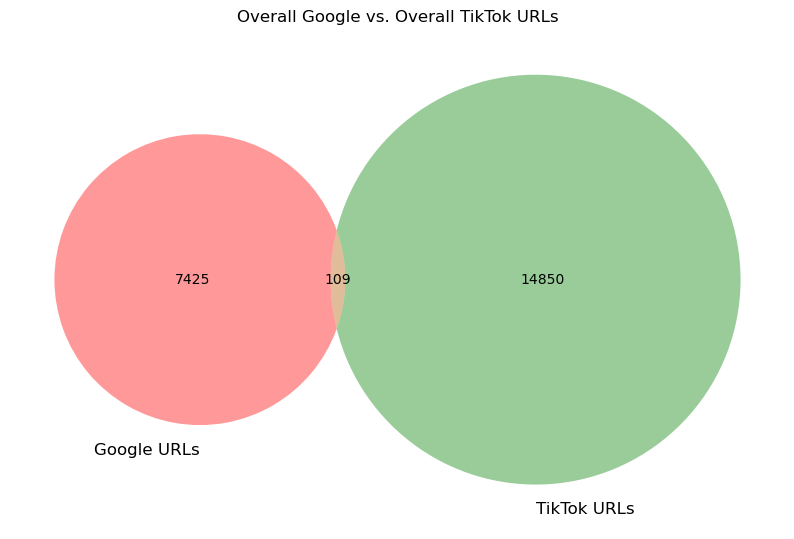

In [90]:
plt.figure(figsize=(10, 7))
venn1 = venn2(subsets=(overall_google_url_count, overall_tiktok_url_count, len(google_set.intersection(tiktok_set))),
              set_labels=('Google URLs', 'TikTok URLs'))
plt.title('Overall Google vs. Overall TikTok URLs')
plt.show()


### Comparison between Google Vs Tiktok Private ###

In [91]:
total_google_results = len(google_search_results)
total_tiktok_results = len(tiktok_search_results)

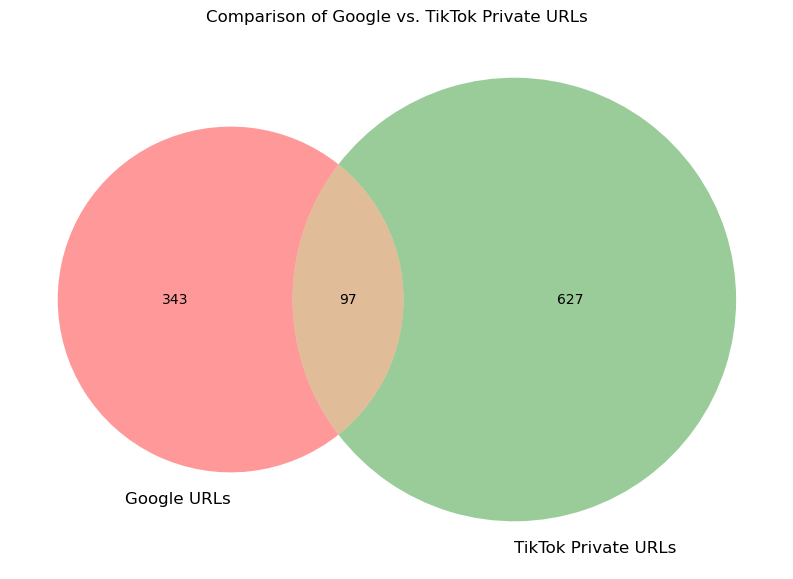

In [85]:
tiktok_private_results = tiktok_search_results[tiktok_search_results['Account_Type'] == 'Private']
tiktok_public_results = tiktok_search_results[tiktok_search_results['Account_Type'] == 'Public']
google_urls = google_search_results['URL'].dropna().str.lower().unique()
tiktok_private_urls = tiktok_private_results['URL'].dropna().str.lower().unique()  
google_set = set(google_urls)
tiktok_private_set = set(tiktok_private_urls)
plt.figure(figsize=(10, 7))
venn2(subsets=(len(google_set), len(tiktok_private_set), len(google_set.intersection(tiktok_private_set))),
      set_labels=('Google URLs', 'TikTok Private URLs'))
plt.title('Comparison of Google vs. TikTok Private URLs')
plt.show()

## Google Vs Tiktok Public URL ##

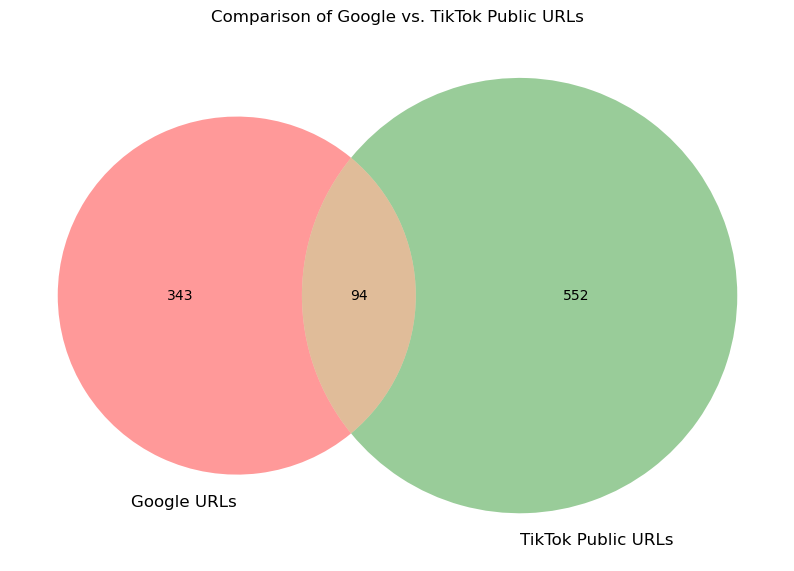

In [98]:
# Filter TikTok data to include only public account types
tiktok_public_results = tiktok_search_results[tiktok_search_results['Account_Type'] == 'Public']

# Calculate unique URL counts
google_urls = google_search_results['URL'].dropna().str.lower().unique()
tiktok_public_urls = tiktok_public_results['URL'].dropna().str.lower().unique()

google_set = set(google_urls)
tiktok_public_set = set(tiktok_public_urls)


# Plot the Venn diagram
plt.figure(figsize=(10, 7))
venn2(subsets=(len(google_set), len(tiktok_public_set), len(google_set.intersection(tiktok_public_set))),
      set_labels=('Google URLs', 'TikTok Public URLs'))
plt.title('Comparison of Google vs. TikTok Public URLs')
plt.show()


## Google unique Urls vs Tiktok overall unique Urls ##

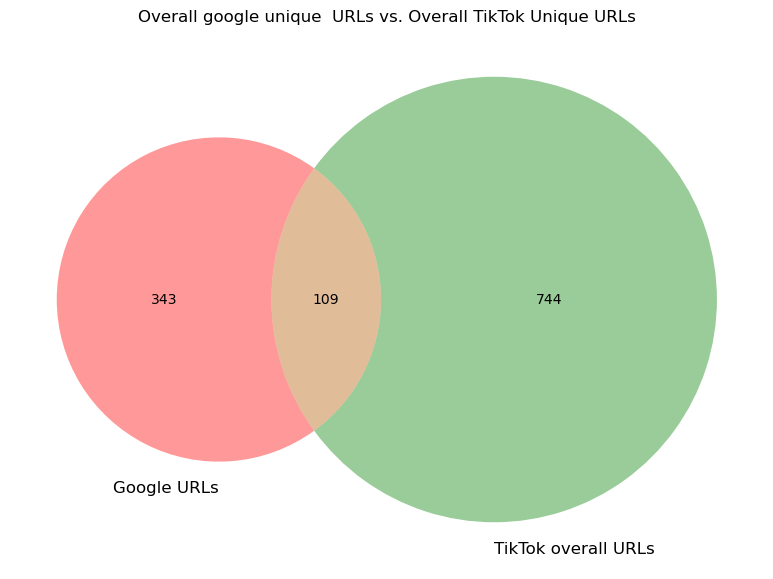

In [99]:
plt.figure(figsize=(10, 7))
venn2(subsets=(overall_google_url_unique_count, overall_tiktok_url_unique_count, len(google_set.intersection(tiktok_set))),
      set_labels=('Google URLs', 'TikTok overall URLs'))
plt.title('Overall google unique  URLs vs. Overall TikTok Unique URLs')
plt.show()

## Tiktok Private URL Vs Tiktok Public URL ##

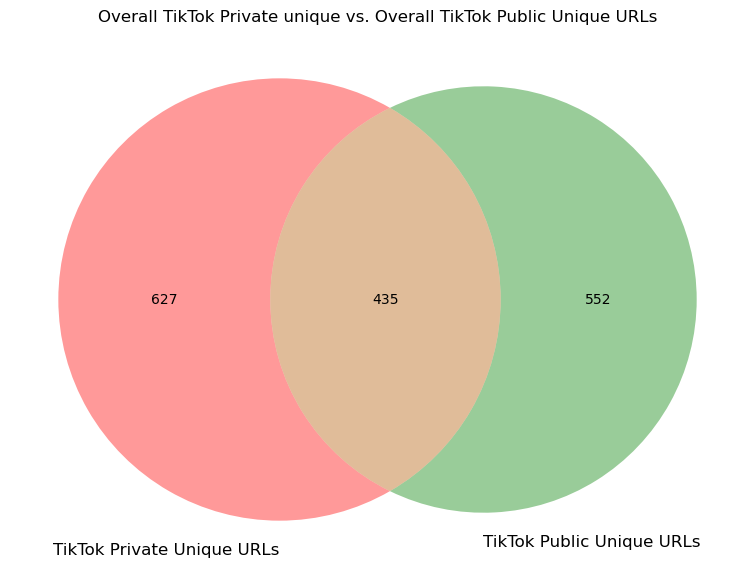

In [100]:
plt.figure(figsize=(10, 7))
venn2(subsets=(tiktok_private_unique_url_count, tiktok_public_unique_url_count, len(set(tiktok_private_urls).intersection(set(tiktok_public_urls)))),
      set_labels=('TikTok Private Unique URLs', 'TikTok Public Unique URLs'))
plt.title('Overall TikTok Private unique vs. Overall TikTok Public Unique URLs')
plt.show()

## Keyword Analysis ##

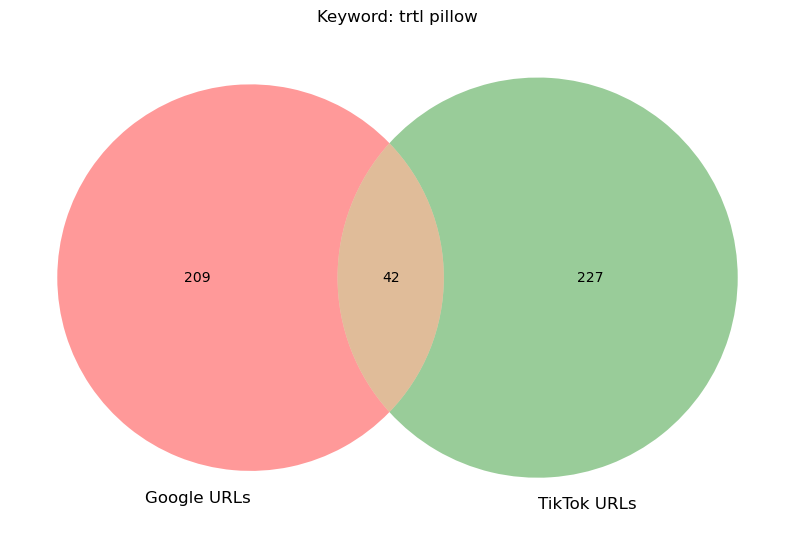

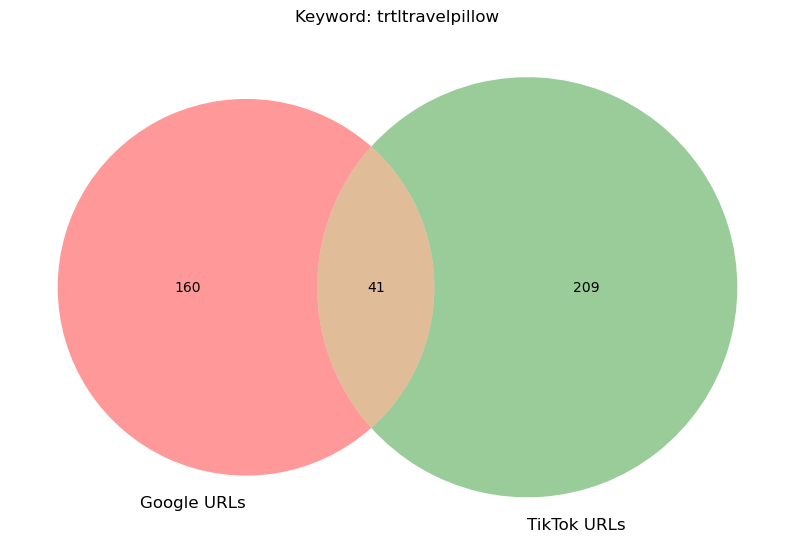

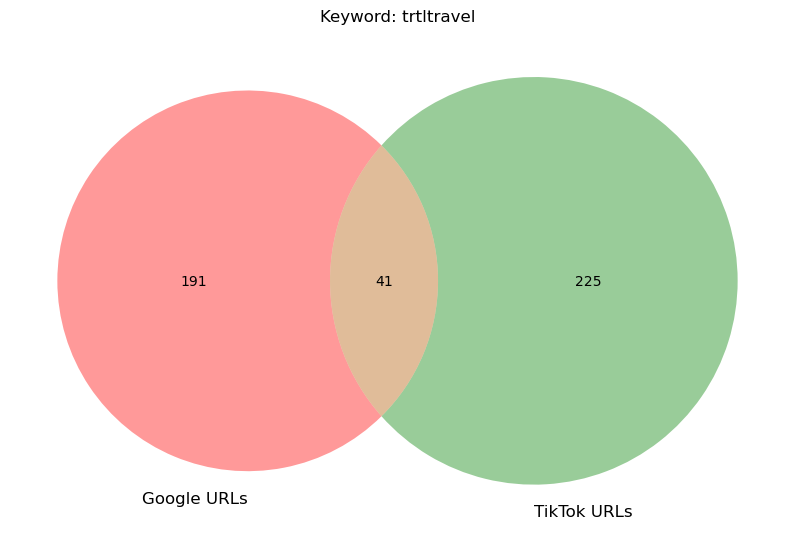

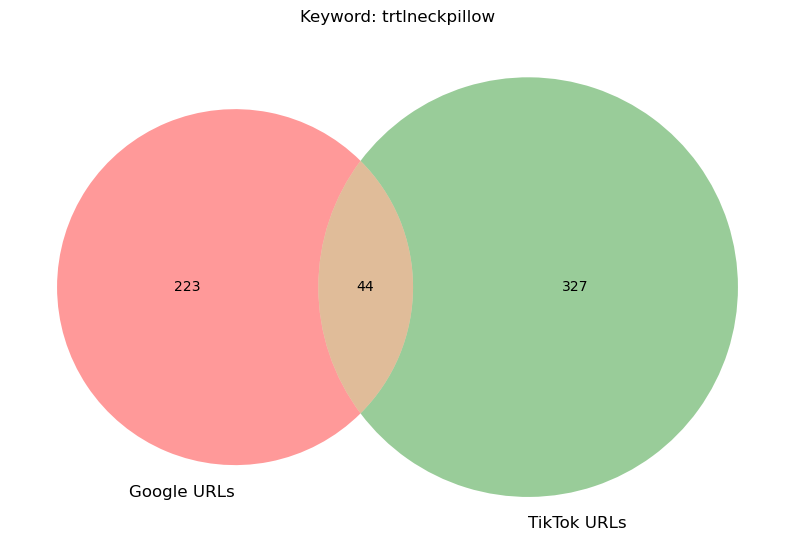

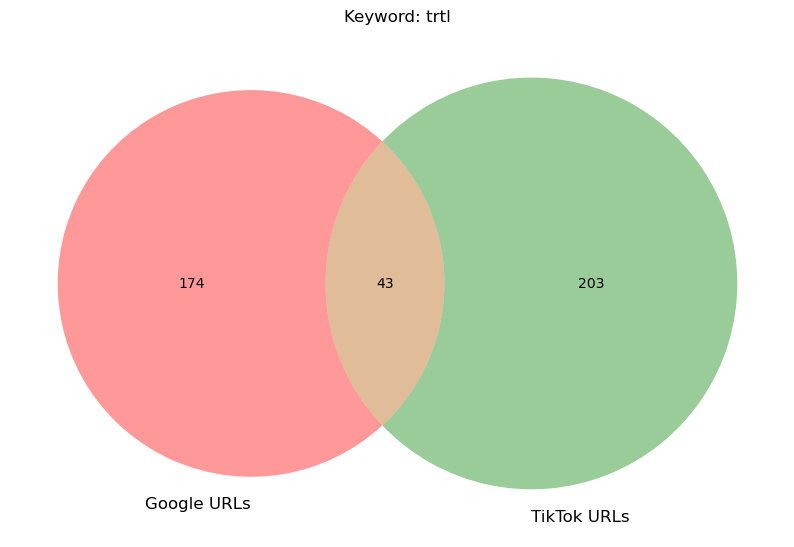

In [25]:
keywords = set(google_search_results['Keyword']).union(set(tiktok_search_results['Keyword']))

for keyword in keywords:
    # Filter URLs by keyword
    google_urls = google_search_results[google_search_results['Keyword'] == keyword]['URL'].dropna().str.lower().unique()
    tiktok_urls = tiktok_search_results[tiktok_search_results['Keyword'] == keyword]['URL'].dropna().str.lower().unique()
    
    google_set = set(google_urls)
    tiktok_set = set(tiktok_urls)
    
    plt.figure(figsize=(10, 7))
    venn2(subsets=(len(google_set), len(tiktok_set), len(google_set.intersection(tiktok_set))),
          set_labels=('Google URLs', 'TikTok URLs'))
    plt.title(f'Keyword: {keyword}')
    plt.show()

In [26]:
google_search_results.head()

Keyword  Position                                              Title  \
0    trtl         1                 Trtl Travel (@trtltravel) Official   
1    trtl         2                                        Trtl Pillow   
2    trtl         3  trtltravelpillow is scientifically proven to k...   
3    trtl         4                                   trtltravelpillow   
4    trtl         5                                 Trtl Pillow Review   

                                                 URL Account_Type Time_Period  
0                 https://www.tiktok.com/@trtltravel       Google  04/07/2024  
1        https://www.tiktok.com/discover/trtl-pillow       Google  04/07/2024  
2  https://www.tiktok.com/@raz_856/video/73859117...       Google  04/07/2024  
3  https://www.tiktok.com/discover/Trtl-travel-pi...       Google  04/07/2024  
4  https://www.tiktok.com/discover/trtl-pillow-re...       Google  04/07/2024

In [27]:
tiktok_search_results.head()

Keyword                                      Search_Result  Position  \
0    trtl  0: "https://www.tiktok.com/@brennanandashley/v...         1   
1    trtl  1: "https://www.tiktok.com/@mylifeaseva/video/...         2   
2    trtl  2: "https://www.tiktok.com/@colleenlanin/video...         3   
3    trtl  3: "https://www.tiktok.com/@itsmarianavelez/vi...         4   
4    trtl  4: "https://www.tiktok.com/@trtltravel/video/7...         5   

                                                 URL Account_Type Time_Period  
0  https://www.tiktok.com/@brennanandashley/video...      Private  18/07/2024  
1  https://www.tiktok.com/@mylifeaseva/video/7173...      Private  18/07/2024  
2  https://www.tiktok.com/@colleenlanin/video/737...      Private  18/07/2024  
3  https://www.tiktok.com/@itsmarianavelez/video/...      Private  18/07/2024  
4  https://www.tiktok.com/@trtltravel/video/71621...      Private  18/07/2024

In [28]:
google_search_results=google_search_results.drop(columns=['Title'])

In [29]:
google_search_results.head()

Keyword  Position                                                URL  \
0    trtl         1                 https://www.tiktok.com/@trtltravel   
1    trtl         2        https://www.tiktok.com/discover/trtl-pillow   
2    trtl         3  https://www.tiktok.com/@raz_856/video/73859117...   
3    trtl         4  https://www.tiktok.com/discover/Trtl-travel-pi...   
4    trtl         5  https://www.tiktok.com/discover/trtl-pillow-re...   

  Account_Type Time_Period  
0       Google  04/07/2024  
1       Google  04/07/2024  
2       Google  04/07/2024  
3       Google  04/07/2024  
4       Google  04/07/2024

In [30]:
tiktok_search_results=tiktok_search_results.drop(columns=['Search_Result'])

In [31]:
tiktok_search_results.head()

Keyword  Position                                                URL  \
0    trtl         1  https://www.tiktok.com/@brennanandashley/video...   
1    trtl         2  https://www.tiktok.com/@mylifeaseva/video/7173...   
2    trtl         3  https://www.tiktok.com/@colleenlanin/video/737...   
3    trtl         4  https://www.tiktok.com/@itsmarianavelez/video/...   
4    trtl         5  https://www.tiktok.com/@trtltravel/video/71621...   

  Account_Type Time_Period  
0      Private  18/07/2024  
1      Private  18/07/2024  
2      Private  18/07/2024  
3      Private  18/07/2024  
4      Private  18/07/2024

In [32]:
#google_search_results=google_search_results.drop(columns=['Title'])

In [33]:
#tiktok_search_results=tiktok_search_results.drop(columns=['Search_Result'])

In [34]:
google_search_results.head()

Keyword  Position                                                URL  \
0    trtl         1                 https://www.tiktok.com/@trtltravel   
1    trtl         2        https://www.tiktok.com/discover/trtl-pillow   
2    trtl         3  https://www.tiktok.com/@raz_856/video/73859117...   
3    trtl         4  https://www.tiktok.com/discover/Trtl-travel-pi...   
4    trtl         5  https://www.tiktok.com/discover/trtl-pillow-re...   

  Account_Type Time_Period  
0       Google  04/07/2024  
1       Google  04/07/2024  
2       Google  04/07/2024  
3       Google  04/07/2024  
4       Google  04/07/2024

In [35]:
tiktok_search_results.head()

Keyword  Position                                                URL  \
0    trtl         1  https://www.tiktok.com/@brennanandashley/video...   
1    trtl         2  https://www.tiktok.com/@mylifeaseva/video/7173...   
2    trtl         3  https://www.tiktok.com/@colleenlanin/video/737...   
3    trtl         4  https://www.tiktok.com/@itsmarianavelez/video/...   
4    trtl         5  https://www.tiktok.com/@trtltravel/video/71621...   

  Account_Type Time_Period  
0      Private  18/07/2024  
1      Private  18/07/2024  
2      Private  18/07/2024  
3      Private  18/07/2024  
4      Private  18/07/2024

## Position Analysis ##

### Correlation between Tiktok and google positions ###

Position_tiktok  Position_google
Position_tiktok         1.000000         0.034403
Position_google         0.034403         1.000000

Keyword                                                URL  \
0                trtl  https://www.tiktok.com/@brennanandashley/video...   
1                trtl  https://www.tiktok.com/@brennanandashley/video...   
2                trtl  https://www.tiktok.com/@brennanandashley/video...   
3                trtl  https://www.tiktok.com/@brennanandashley/video...   
4                trtl  https://www.tiktok.com/@brennanandashley/video...   
...               ...                                                ...   
69564     trtl pillow  https://www.tiktok.com/@freakinreviews/video/7...   
69565     trtl pillow  https://www.tiktok.com/@freakinreviews/video/7...   
69566     trtl pillow  https://www.tiktok.com/@freakinreviews/video/7...   
69567  trtlneckpillow  https://www.tiktok.com/@epthelatino/video/7342...   
69568  trtlneckpillow  https://www.tiktok.com/@epthelatino/video/7342...   

       Position_tiktok  Position_google  
0                    1               29  
1                    1               29  
2                    1               26  
3                    1               24  
4                    1               34  
...                ...              ...  
69564               76               33  
69565               76               32  
69566               76               73  
69567               55               84  
69568               79               84  

[69569 rows x 4 columns]

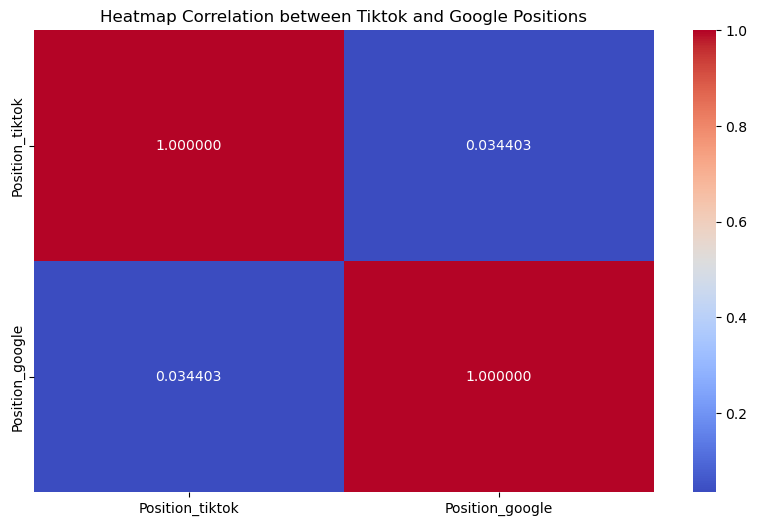

In [36]:

tiktok_private_results = tiktok_search_results[tiktok_search_results['Account_Type'] == 'Private']
tiktok_positions=tiktok_search_results[['Keyword','URL','Position']]
google_positions=google_search_results[['Keyword','URL','Position']]
#correlation between positions of URLs in Google and Tiktok
merged_positions=pd.merge(tiktok_positions,google_positions,on=['Keyword','URL'],suffixes=('_tiktok','_google'))
correlation_positions=merged_positions[['Position_tiktok','Position_google']].corr()
display(correlation_positions)
display(merged_positions)
plt.figure(figsize=(10,6))
sns.heatmap(correlation_positions,annot=True,fmt=".6f",cmap='coolwarm',cbar=True)
plt.title('Heatmap Correlation between Tiktok and Google Positions')
plt.show()

### Position Comparison between Tiktok private and Google ###

In [37]:
#Position Comparison between private account type and google on keyboard & URL

tiktok_private_results = tiktok_search_results[tiktok_search_results['Account_Type'] == 'Private']
url_position_comparison=pd.merge(
    tiktok_private_results[['Keyword','URL','Position','Time_Period']],
    google_search_results[['Keyword','URL','Position','Time_Period']],
    on=['Keyword','URL','Time_Period'],
    suffixes=('_tiktok','_google')
).drop_duplicates()

url_position_comparison=url_position_comparison.rename(
    columns={
        'position_tiktok':'position_tiktok',
        'position_google':'position_google'
    }
)
#url_position_comparison.head()
display(url_position_comparison)
#url_position_comparison_sorted.head()
print(url_position_comparison)



Keyword                                                URL  \
0            trtl  https://www.tiktok.com/@brennanandashley/video...   
1            trtl  https://www.tiktok.com/@brennanandashley/video...   
2            trtl  https://www.tiktok.com/@brennanandashley/video...   
3            trtl  https://www.tiktok.com/@brennanandashley/video...   
4            trtl  https://www.tiktok.com/@brennanandashley/video...   
...           ...                                                ...   
2275  trtl pillow  https://www.tiktok.com/@elenatea_/video/723665...   
2276  trtl pillow  https://www.tiktok.com/@fromabolivian/video/72...   
2277  trtl pillow  https://www.tiktok.com/@splishsplashsky/video/...   
2278  trtl pillow  https://www.tiktok.com/@missnay_xo/video/73347...   
2279  trtl pillow  https://www.tiktok.com/@seanwbrown99/video/732...   

      Position_tiktok Time_Period  Position_google  
0                   1  18/07/2024               34  
1                  13  18/07/2024               34  
2                  25  18/07/2024               34  
3                  37  18/07/2024               34  
4                  61  18/07/2024               34  
...               ...         ...              ...  
2275               33  05/07/2024               23  
2276               37  05/07/2024               67  
2277               38  05/07/2024               46  
2278               44  05/07/2024               87  
2279               51  05/07/2024               16  

[2280 rows x 5 columns]

          Keyword                                                URL  \
0            trtl  https://www.tiktok.com/@brennanandashley/video...   
1            trtl  https://www.tiktok.com/@brennanandashley/video...   
2            trtl  https://www.tiktok.com/@brennanandashley/video...   
3            trtl  https://www.tiktok.com/@brennanandashley/video...   
4            trtl  https://www.tiktok.com/@brennanandashley/video...   
...           ...                                                ...   
2275  trtl pillow  https://www.tiktok.com/@elenatea_/video/723665...   
2276  trtl pillow  https://www.tiktok.com/@fromabolivian/video/72...   
2277  trtl pillow  https://www.tiktok.com/@splishsplashsky/video/...   
2278  trtl pillow  https://www.tiktok.com/@missnay_xo/video/73347...   
2279  trtl pillow  https://www.tiktok.com/@seanwbrown99/video/732...   

      Position_tiktok Time_Period  Position_google  
0                   1  18/07/2024               34  
1                  13  18/07/

### Export the position comparison data ###

In [38]:
csv_file_path='url_position_comparison.csv'
url_position_comparison.to_csv(csv_file_path,index=False)
print(f"csv file saved")

csv file saved


In [39]:
tiktok_private_results = tiktok_search_results[tiktok_search_results['Account_Type'] == 'Private']
merged_data2 = pd.merge(
    tiktok_private_results[['Keyword', 'URL', 'Position', 'Time_Period']],
    google_search_results[['Keyword', 'URL', 'Position', 'Time_Period']],
    on=['Keyword', 'URL', 'Time_Period'],
    suffixes=('_tiktok', '_google')
).drop_duplicates()
merged_data2['Time_Period']=pd.to_datetime(merged_data2['Time_Period'],format='%d/%m/%Y',errors='coerce')
display(merged_data2)

Keyword                                                URL  \
0            trtl  https://www.tiktok.com/@brennanandashley/video...   
1            trtl  https://www.tiktok.com/@brennanandashley/video...   
2            trtl  https://www.tiktok.com/@brennanandashley/video...   
3            trtl  https://www.tiktok.com/@brennanandashley/video...   
4            trtl  https://www.tiktok.com/@brennanandashley/video...   
...           ...                                                ...   
2275  trtl pillow  https://www.tiktok.com/@elenatea_/video/723665...   
2276  trtl pillow  https://www.tiktok.com/@fromabolivian/video/72...   
2277  trtl pillow  https://www.tiktok.com/@splishsplashsky/video/...   
2278  trtl pillow  https://www.tiktok.com/@missnay_xo/video/73347...   
2279  trtl pillow  https://www.tiktok.com/@seanwbrown99/video/732...   

      Position_tiktok Time_Period  Position_google  
0                   1  2024-07-18               34  
1                  13  2024-07-18               34  
2                  25  2024-07-18               34  
3                  37  2024-07-18               34  
4                  61  2024-07-18               34  
...               ...         ...              ...  
2275               33  2024-07-05               23  
2276               37  2024-07-05               67  
2277               38  2024-07-05               46  
2278               44  2024-07-05               87  
2279               51  2024-07-05               16  

[2280 rows x 5 columns]

### Analysis of keywords and URLs trend over time ###

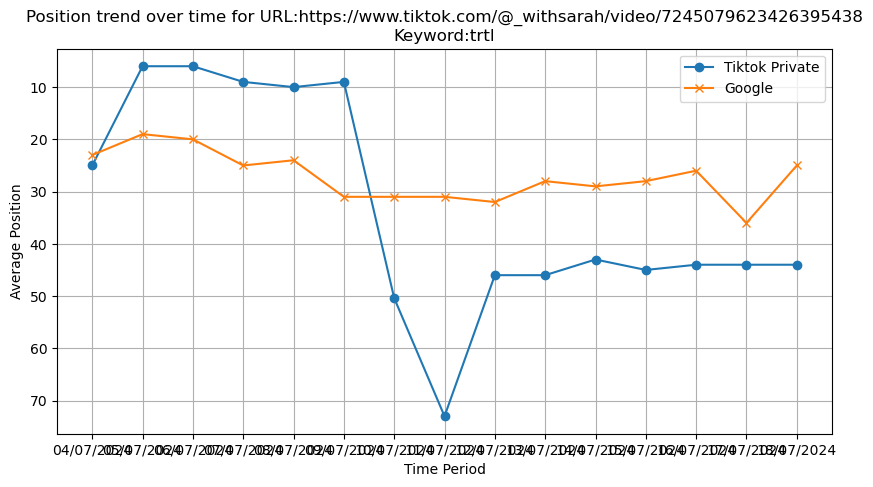

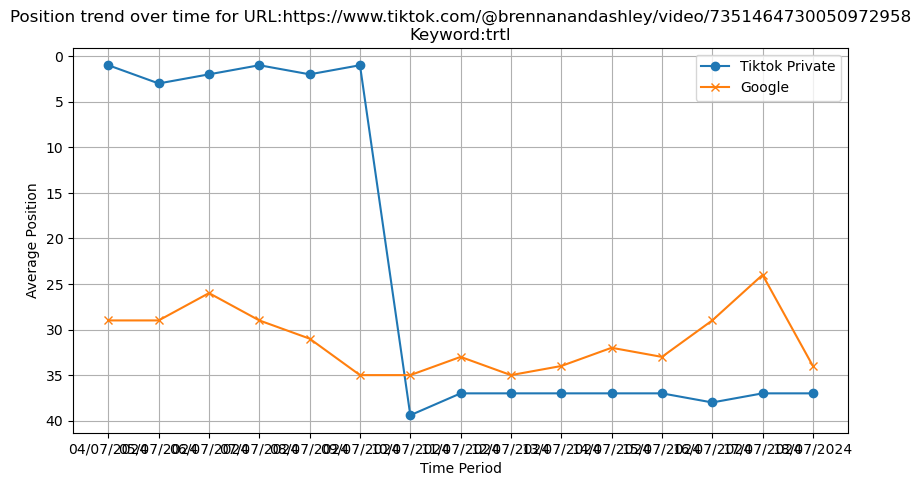

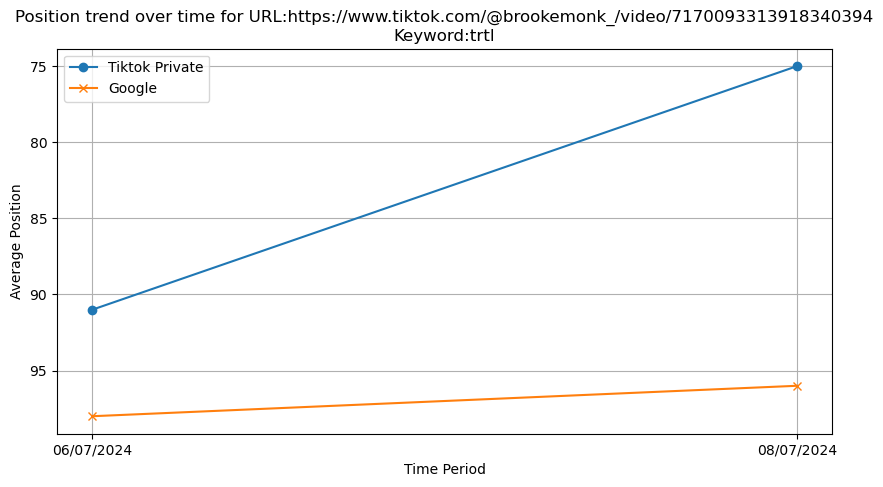

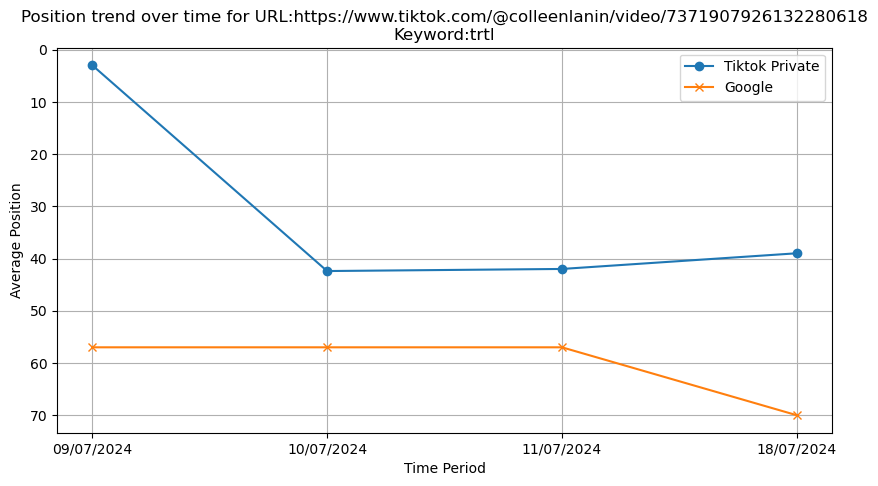

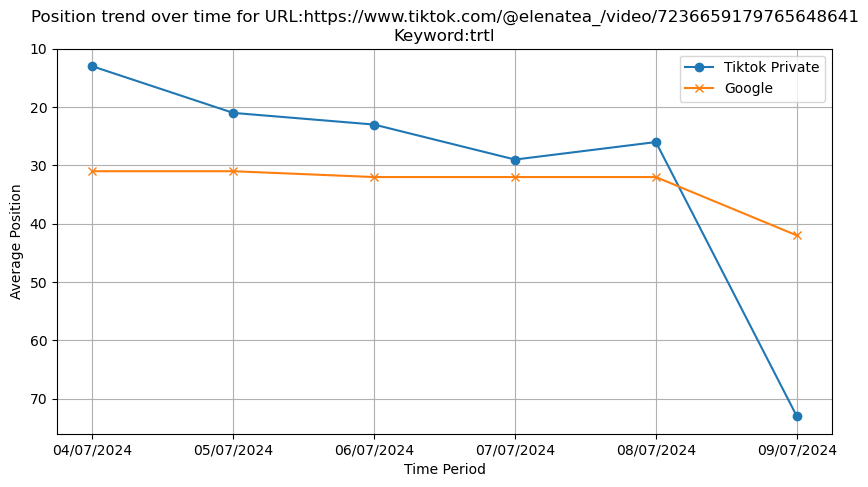

Keyword                                                URL  \
0                trtl  https://www.tiktok.com/@_withsarah/video/72450...   
1                trtl  https://www.tiktok.com/@_withsarah/video/72450...   
2                trtl  https://www.tiktok.com/@_withsarah/video/72450...   
3                trtl  https://www.tiktok.com/@_withsarah/video/72450...   
4                trtl  https://www.tiktok.com/@_withsarah/video/72450...   
..                ...                                                ...   
876  trtltravelpillow  https://www.tiktok.com/@trtltravel/video/72857...   
877  trtltravelpillow  https://www.tiktok.com/@trtltravel/video/72857...   
878  trtltravelpillow  https://www.tiktok.com/@trtltravel/video/72857...   
879  trtltravelpillow  https://www.tiktok.com/@vickirutwind/video/726...   
880  trtltravelpillow  https://www.tiktok.com/@vickirutwind/video/726...   

    Time_Period  avg_position_tiktok  avg_position_google  
0    04/07/2024                 25.0                 23.0  
1    05/07/2024                  6.0                 19.0  
2    06/07/2024                  6.0                 20.0  
3    07/07/2024                  9.0                 25.0  
4    08/07/2024                 10.0                 24.0  
..          ...                  ...                  ...  
876  06/07/2024                 45.0                 75.0  
877  07/07/2024                 51.0                 75.0  
878  08/07/2024                 49.0                 77.0  
879  05/07/2024                 29.0                 63.0  
880  06/07/2024                 26.0                 56.0  

[881 rows x 5 columns]

In [40]:
tiktok_private_results = tiktok_search_results[tiktok_search_results['Account_Type'] == 'Private']

tiktok_positions=tiktok_private_results[['Keyword','URL','Position','Time_Period']]
google_positions=google_search_results[['Keyword','URL','Position','Time_Period']]
#finding the avg position
tiktok_avg_positions=tiktok_positions.groupby(['Keyword','URL','Time_Period']).agg(avg_position_tiktok=('Position','mean')).reset_index()
google_avg_positions=google_positions.groupby(['Keyword','URL','Time_Period']).agg(avg_position_google=('Position','mean')).reset_index()

url_position_comparison=pd.merge(tiktok_avg_positions,google_avg_positions,on=['Keyword','URL','Time_Period'],how='inner')
def plot_trend(Keyword,URL):
    data=url_position_comparison[(url_position_comparison['Keyword']==Keyword)&
                          (url_position_comparison['URL']==URL)]
    plt.figure(figsize=(10,5))
    plt.plot(data['Time_Period'],data['avg_position_tiktok'],marker='o',linestyle='-',label='Tiktok Private')
    plt.plot(data['Time_Period'],data['avg_position_google'],marker='x',linestyle='-',label='Google')
    plt.gca().invert_yaxis() #1 is top rank
    plt.title(f'Position trend over time for URL:{URL}\nKeyword:{Keyword}')
    plt.xlabel('Time Period')
    plt.ylabel('Average Position')
    plt.legend()
    plt.grid(True)
    plt.show()
sample_urls = url_position_comparison['URL'].unique()[:5]  #sample 5 URLs
for url in sample_urls:
    sample_Keyword = url_position_comparison[url_position_comparison['URL'] == url]['Keyword'].iloc[0]
    plot_trend(sample_Keyword, url)
display(url_position_comparison)

### Average position of top 5 UNIQUE URLs for each keyword ###

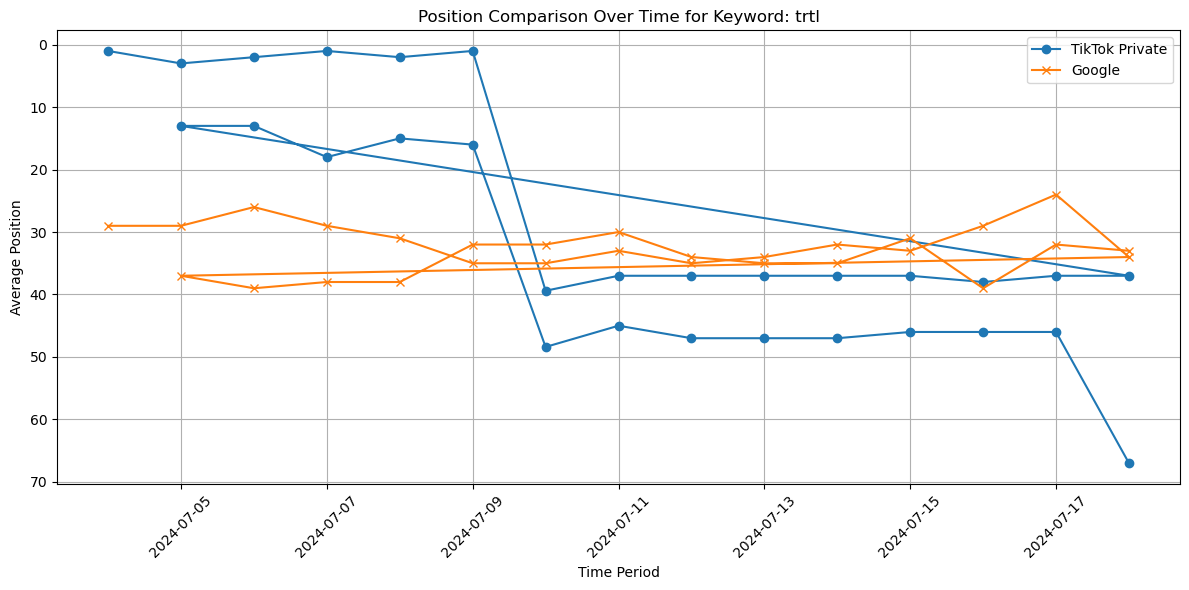

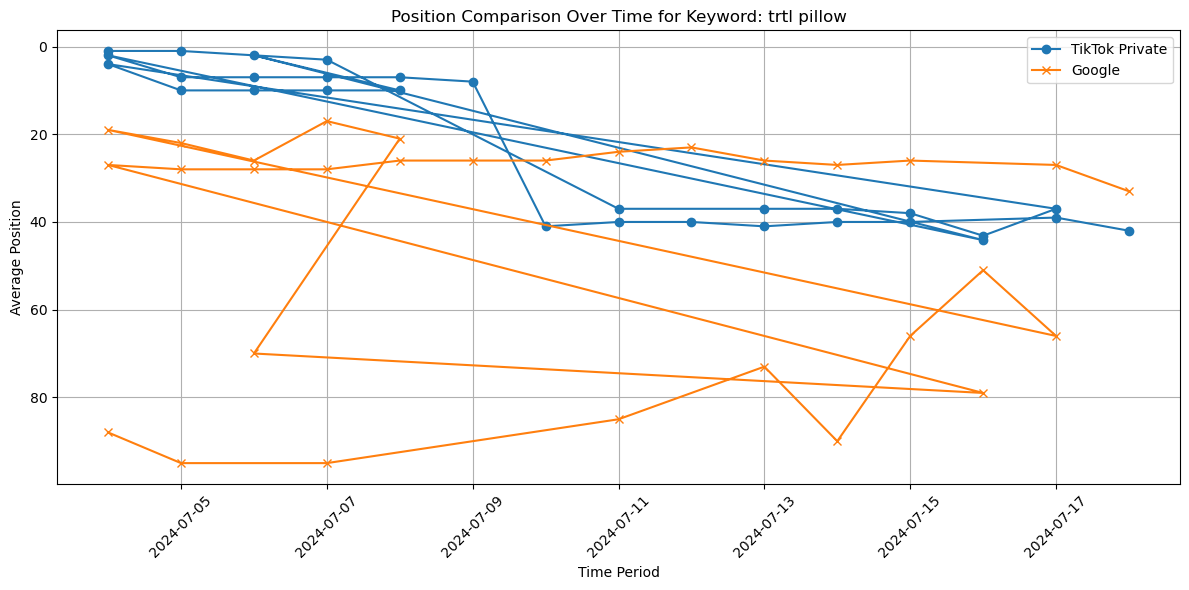

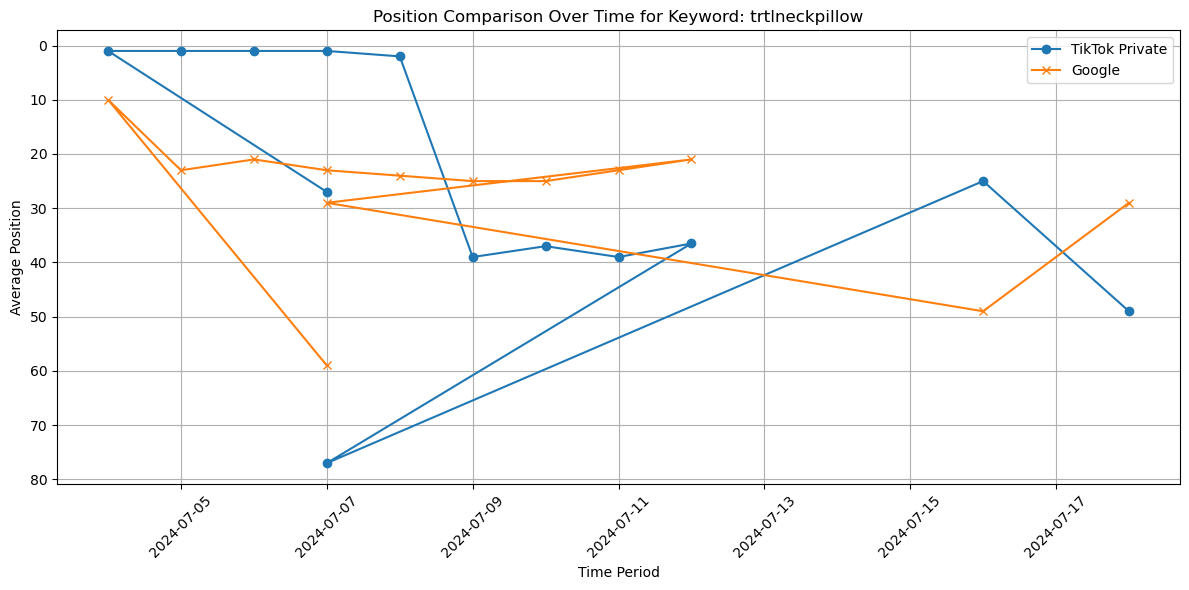

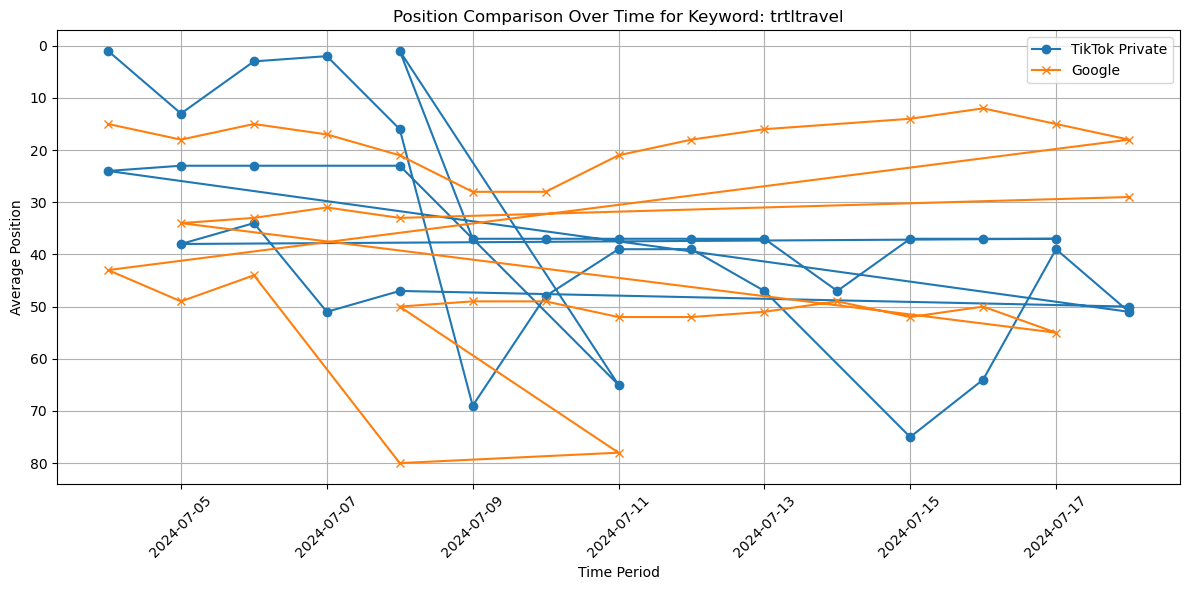

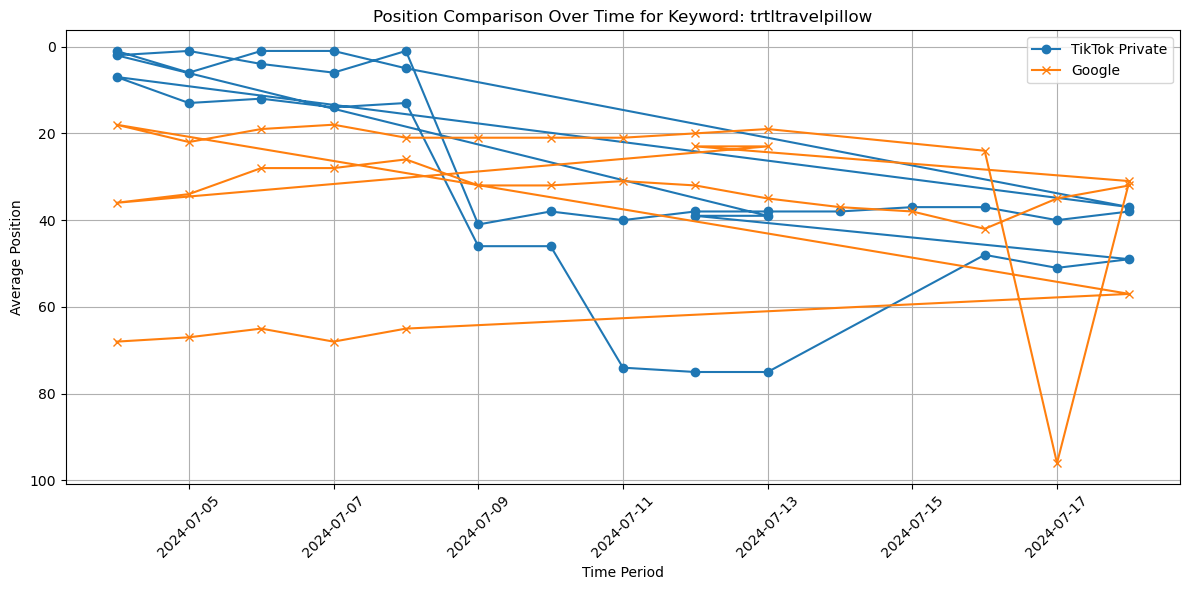

Keyword                                                URL  \
15               trtl  https://www.tiktok.com/@brennanandashley/video...   
16               trtl  https://www.tiktok.com/@brennanandashley/video...   
17               trtl  https://www.tiktok.com/@brennanandashley/video...   
18               trtl  https://www.tiktok.com/@brennanandashley/video...   
19               trtl  https://www.tiktok.com/@brennanandashley/video...   
..                ...                                                ...   
863  trtltravelpillow  https://www.tiktok.com/@thenonstopdreamer/vide...   
864  trtltravelpillow  https://www.tiktok.com/@thenonstopdreamer/vide...   
865  trtltravelpillow  https://www.tiktok.com/@thenonstopdreamer/vide...   
866  trtltravelpillow  https://www.tiktok.com/@thenonstopdreamer/vide...   
867  trtltravelpillow  https://www.tiktok.com/@thenonstopdreamer/vide...   

    Time_Period  Position_tiktok  Position_google  
15   2024-07-04              1.0             29.0  
16   2024-07-05              3.0             29.0  
17   2024-07-06              2.0             26.0  
18   2024-07-07              1.0             29.0  
19   2024-07-08              2.0             31.0  
..          ...              ...              ...  
863  2024-07-14             38.0             37.0  
864  2024-07-15             37.0             38.0  
865  2024-07-16             37.0             42.0  
866  2024-07-17             40.0             35.0  
867  2024-07-18             38.0             32.0  

[142 rows x 5 columns]

In [105]:
tiktok_private_results = tiktok_search_results[tiktok_search_results['Account_Type'] == 'Private']

def get_top_5_urls(data):
    avg_position=data.groupby(['Keyword','URL']).agg({'Position': 'mean'}).reset_index(drop=True)
    top_5_urls=avg_position=data.groupby('Keyword').apply(lambda x: x.nsmallest(5,'Position')).reset_index(drop=True)
    return top_5_urls
tiktok_top_5=get_top_5_urls(tiktok_private_results)

# Merge with Google data on Keyword and URL, calculate average position per day
tiktok_avg = tiktok_private_results.groupby(['Keyword', 'URL', 'Time_Period']).agg({'Position': 'mean'}).reset_index()
google_avg = google_search_results.groupby(['Keyword', 'URL', 'Time_Period']).agg({'Position': 'mean'}).reset_index()

# Merge TikTok and Google data
comparison_data = pd.merge(tiktok_avg, google_avg, on=['Keyword', 'URL', 'Time_Period'], suffixes=('_tiktok', '_google')).reset_index(drop=True)

# comparison data for top 5 URLs of each keyword
filtered_comparison_data = comparison_data[comparison_data['URL'].isin(tiktok_top_5['URL'])]

# Plot the position changes
for keyword in tiktok_top_5['Keyword'].unique():
    keyword_data = filtered_comparison_data[filtered_comparison_data['Keyword'] == keyword]
    
    plt.figure(figsize=(12, 6))
    plt.plot(keyword_data['Time_Period'], keyword_data['Position_tiktok'], 'o-', label='TikTok Private')
    plt.plot(keyword_data['Time_Period'], keyword_data['Position_google'], 'x-', label='Google')
    plt.xticks(rotation=45)
    plt.gca().invert_yaxis()  # Invert y-axis
    plt.title(f'Position Comparison Over Time for Keyword: {keyword}')
    plt.xlabel('Time Period')
    plt.ylabel('Average Position')
    plt.legend()
    plt.tight_layout()
    plt.grid(True)
    plt.show()
display(filtered_comparison_data)

#the graph below shows the position change across google and tiktok for multiple URLs, hence multiple lines we can see

### Average position change of top 5 URLS ###

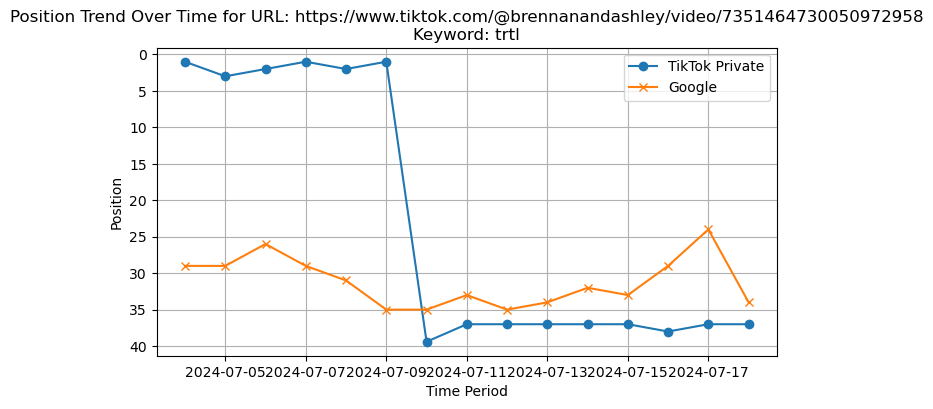

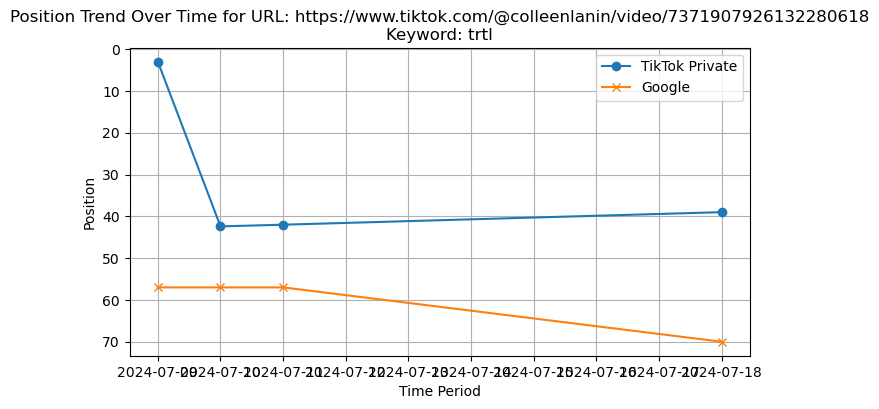

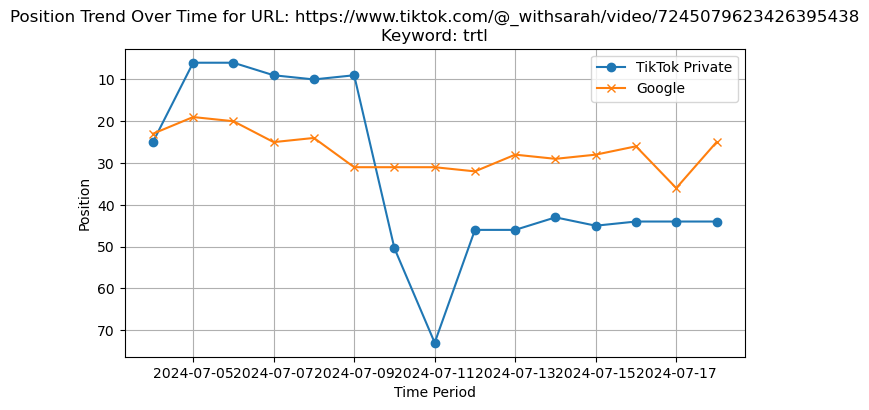

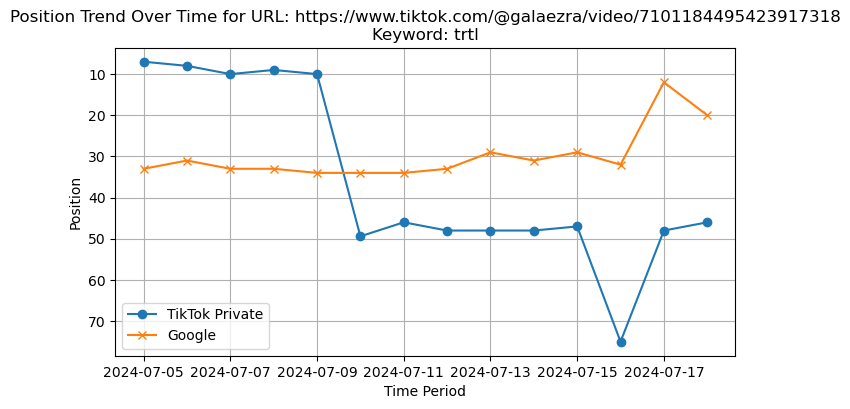

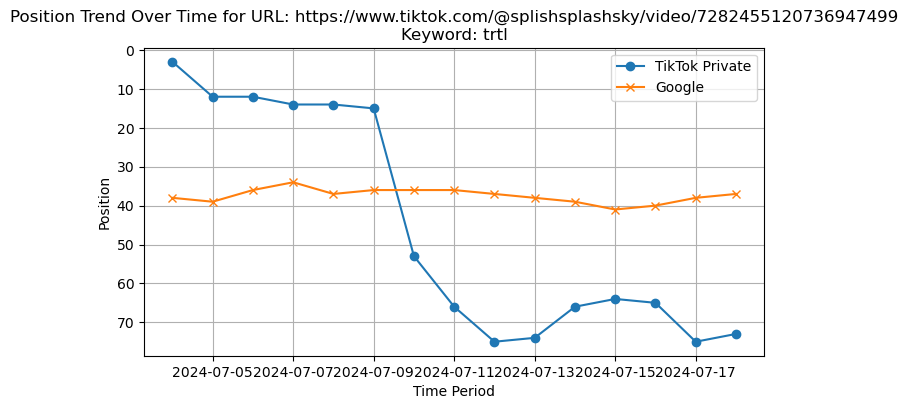

In [103]:
url_position_comparison['Time_Period'] = pd.to_datetime(url_position_comparison['Time_Period'], format='%d/%m/%Y')

def plot_trend(keyword, URL):
    data = url_position_comparison[(url_position_comparison['Keyword'] == keyword) & (url_position_comparison['URL'] == URL)]
    plt.figure(figsize=(8, 4))
    plt.plot(data['Time_Period'], data['avg_position_tiktok'], marker='o', linestyle='-', label='TikTok Private')
    plt.plot(data['Time_Period'], data['avg_position_google'], marker='x', linestyle='-', label='Google')
    plt.gca().invert_yaxis()  # Invert y-axis to show rank 1 at the top
    plt.title(f'Position Trend Over Time for URL: {url}\nKeyword: {keyword}')
    plt.xlabel('Time Period')
    plt.ylabel('Position')
    plt.legend()
    plt.grid(True)
    plt.show()

#  trends for sample  URLs
sample_urls = merged_data2['URL'].unique()[:5]  #sample of 5 URLs
for url in sample_urls:
    sample_keyword = merged_data2[merged_data2['URL'] == url]['Keyword'].iloc[0]
    plot_trend(sample_keyword, url)


# Top 20 tiktok URLS #

In [129]:
tiktok_private_results=tiktok_search_results[tiktok_search_results['Account_Type'] =='Private']
top_20_tiktok_urls =tiktok_private_results.sort_values(by='Position').drop_duplicates(subset='URL').head(20).reset_index()
top_20_google_urls =google_search_results.sort_values(by='Position').drop_duplicates(subset='URL').head(20).reset_index()
top_urls=pd.concat([top_20_tiktok_urls[['URL']],top_20_google_urls[['URL']]]).drop_duplicates().reset_index(drop=True)

# top 20 unique URLs with position
display(top_20_tiktok_urls[['URL', 'Position']], top_20_google_urls[['URL', 'Position']])

URL  Position
0   https://www.tiktok.com/@brennanandashley/video...         1
1   https://www.tiktok.com/@mylifeaseva/video/7173...         1
2   https://www.tiktok.com/@thenonstopdreamer/vide...         1
3   https://www.tiktok.com/@itsmarianavelez/video/...         1
4   https://www.tiktok.com/@pinatravels/video/7214...         1
5   https://www.tiktok.com/@grace.andrewsss/video/...         1
6   https://www.tiktok.com/@simplyyykatie/video/72...         1
7   https://www.tiktok.com/@colleenlanin/video/737...         1
8   https://www.tiktok.com/@boundtoherbackpack/vid...         1
9   https://www.tiktok.com/@splishsplashsky/video/...         2
10  https://www.tiktok.com/@_withsarah/video/72450...         2
11  https://www.tiktok.com/@trtltravel/video/73863...         2
12  https://www.tiktok.com/@nhonsworld/video/71901...         2
13  https://www.tiktok.com/@feedmemelanie/video/72...         2
14  https://www.tiktok.com/@brookemonk_/video/7170...         2
15  https://www.tiktok.com/@gracieoconnnor/video/7...         2
16  https://www.tiktok.com/@trtltravel/video/71621...         3
17  https://www.tiktok.com/@galaezra/video/7101184...         3
18  https://www.tiktok.com/@splishsplashsky/video/...         3
19  https://www.tiktok.com/@somedayfiles/video/698...         3

URL  Position
0                  https://www.tiktok.com/@trtltravel         1
1   https://www.tiktok.com/@wirecutter/video/73169...         1
2   https://www.tiktok.com/@raz_856/video/73859117...         1
3         https://www.tiktok.com/discover/trtl-pillow         1
4   https://www.tiktok.com/@gracieoconnnor/video/7...         1
5   https://www.tiktok.com/@splishsplashsky/video/...         1
6   https://www.tiktok.com/discover/Trtl-travel-pi...         1
7   https://www.tiktok.com/discover/trtl-pillow-re...         2
8   https://www.tiktok.com/@kaseymeetsworld/video/...         2
9   https://www.tiktok.com/discover/trtl-travel-pi...         2
10  https://www.tiktok.com/@nalae.co/video/7278438...         2
11  https://www.tiktok.com/@natbco/video/732778843...         2
12              https://www.tiktok.com/tag/trtltravel         2
13  https://www.tiktok.com/discover/trtl-travel-pi...         2
14  https://www.tiktok.com/@kalialexandria/video/7...         3
15  https://www.tiktok.com/@splishsplashsky/video/...         3
16  https://www.tiktok.com/@gracieoconnnor/video/7...         4
17  https://www.tiktok.com/@_withsarah/video/72450...         4
18  https://www.tiktok.com/@trtltravel/video/73776...         4
19  https://www.tiktok.com/discover/trtl-travel-pi...         5

#### URL position on Tiktok and google ###

In [130]:
merged_trend_data = pd.merge(
    tiktok_private_results[['URL', 'Position', 'Time_Period']],
    google_search_results[['URL', 'Position', 'Time_Period']],
    on=['URL', 'Time_Period'],
    suffixes=('_tiktok', '_google')
)
merged_trend_data = merged_trend_data[merged_trend_data['URL'].isin(top_urls['URL'])]
merged_trend_data['Time_Period'] = pd.to_datetime(merged_trend_data['Time_Period'], format='%d/%m/%Y')
display(merged_trend_data)


URL  Position_tiktok  \
0      https://www.tiktok.com/@brennanandashley/video...                1   
1      https://www.tiktok.com/@brennanandashley/video...                1   
2      https://www.tiktok.com/@brennanandashley/video...                1   
3      https://www.tiktok.com/@brennanandashley/video...                1   
4      https://www.tiktok.com/@brennanandashley/video...               13   
...                                                  ...              ...   
10493  https://www.tiktok.com/@feedmemelanie/video/72...                3   
10494  https://www.tiktok.com/@feedmemelanie/video/72...                3   
10495  https://www.tiktok.com/@feedmemelanie/video/72...                3   
10496  https://www.tiktok.com/@feedmemelanie/video/72...                3   
10497  https://www.tiktok.com/@feedmemelanie/video/72...                3   

      Time_Period  Position_google  
0      2024-07-18               34  
1      2024-07-18               57  
2      2024-07-18               18  
3      2024-07-18               82  
4      2024-07-18               34  
...           ...              ...  
10493  2024-07-16               41  
10494  2024-07-16               81  
10495  2024-07-16               37  
10496  2024-07-16               33  
10497  2024-07-16               89  

[7715 rows x 4 columns]

### Average position chnage of URL Across two platform

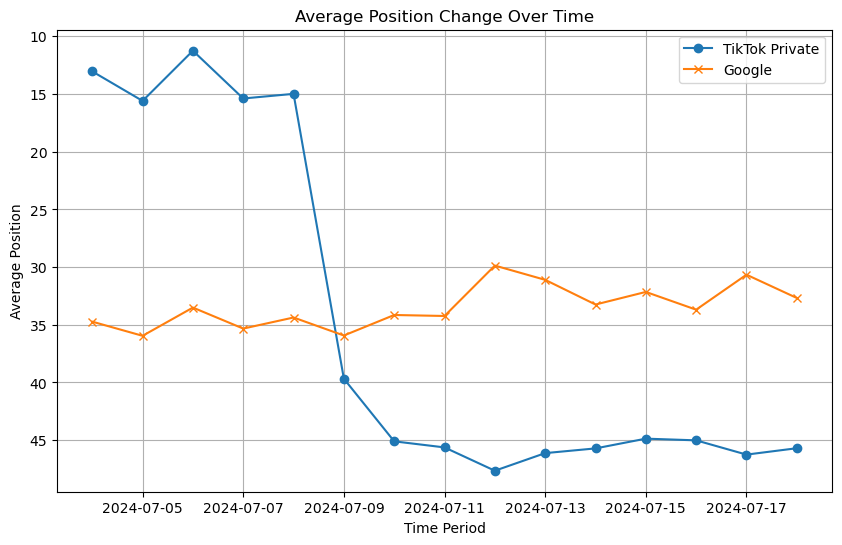

In [128]:
average_position_data = merged_trend_data.groupby('Time_Period').agg(
    avg_position_tiktok=('Position_tiktok', 'mean'),
    avg_position_google=('Position_google', 'mean')
).reset_index()

# Plot the average position change over time
plt.figure(figsize=(10, 6))
plt.plot(average_position_data['Time_Period'], average_position_data['avg_position_tiktok'], marker='o', linestyle='-', label='TikTok Private')
plt.plot(average_position_data['Time_Period'], average_position_data['avg_position_google'], marker='x', linestyle='-', label='Google')
plt.gca().invert_yaxis()  # Invert y-axis 
plt.title('Average Position Change Over Time')
plt.xlabel('Time Period')
plt.ylabel('Average Position')
plt.legend()
plt.grid(True)
plt.show()


In [131]:

# Calculate the average position for each URL on each platform
average_positions = merged_trend_data.groupby('URL').agg(
    avg_position_tiktok=('Position_tiktok', 'mean'),
    avg_position_google=('Position_google', 'mean')
).reset_index()

# Calculate position trends over time
position_trends = merged_trend_data.groupby(['URL', 'Time_Period']).agg(
    avg_position_tiktok=('Position_tiktok', 'mean'),
    avg_position_google=('Position_google', 'mean')
).reset_index()
print(position_trends,average_positions)

                                                   URL Time_Period  \
0    https://www.tiktok.com/@_withsarah/video/72450...  2024-07-04   
1    https://www.tiktok.com/@_withsarah/video/72450...  2024-07-05   
2    https://www.tiktok.com/@_withsarah/video/72450...  2024-07-06   
3    https://www.tiktok.com/@_withsarah/video/72450...  2024-07-07   
4    https://www.tiktok.com/@_withsarah/video/72450...  2024-07-08   
..                                                 ...         ...   
201  https://www.tiktok.com/@trtltravel/video/73863...  2024-07-06   
202  https://www.tiktok.com/@trtltravel/video/73863...  2024-07-07   
203  https://www.tiktok.com/@trtltravel/video/73863...  2024-07-08   
204  https://www.tiktok.com/@trtltravel/video/73863...  2024-07-09   
205  https://www.tiktok.com/@trtltravel/video/73863...  2024-07-10   

     avg_position_tiktok  avg_position_google  
0              30.500000                13.25  
1               4.666667                 9.50  
2              

### Position change over time for top 10 URLs ##

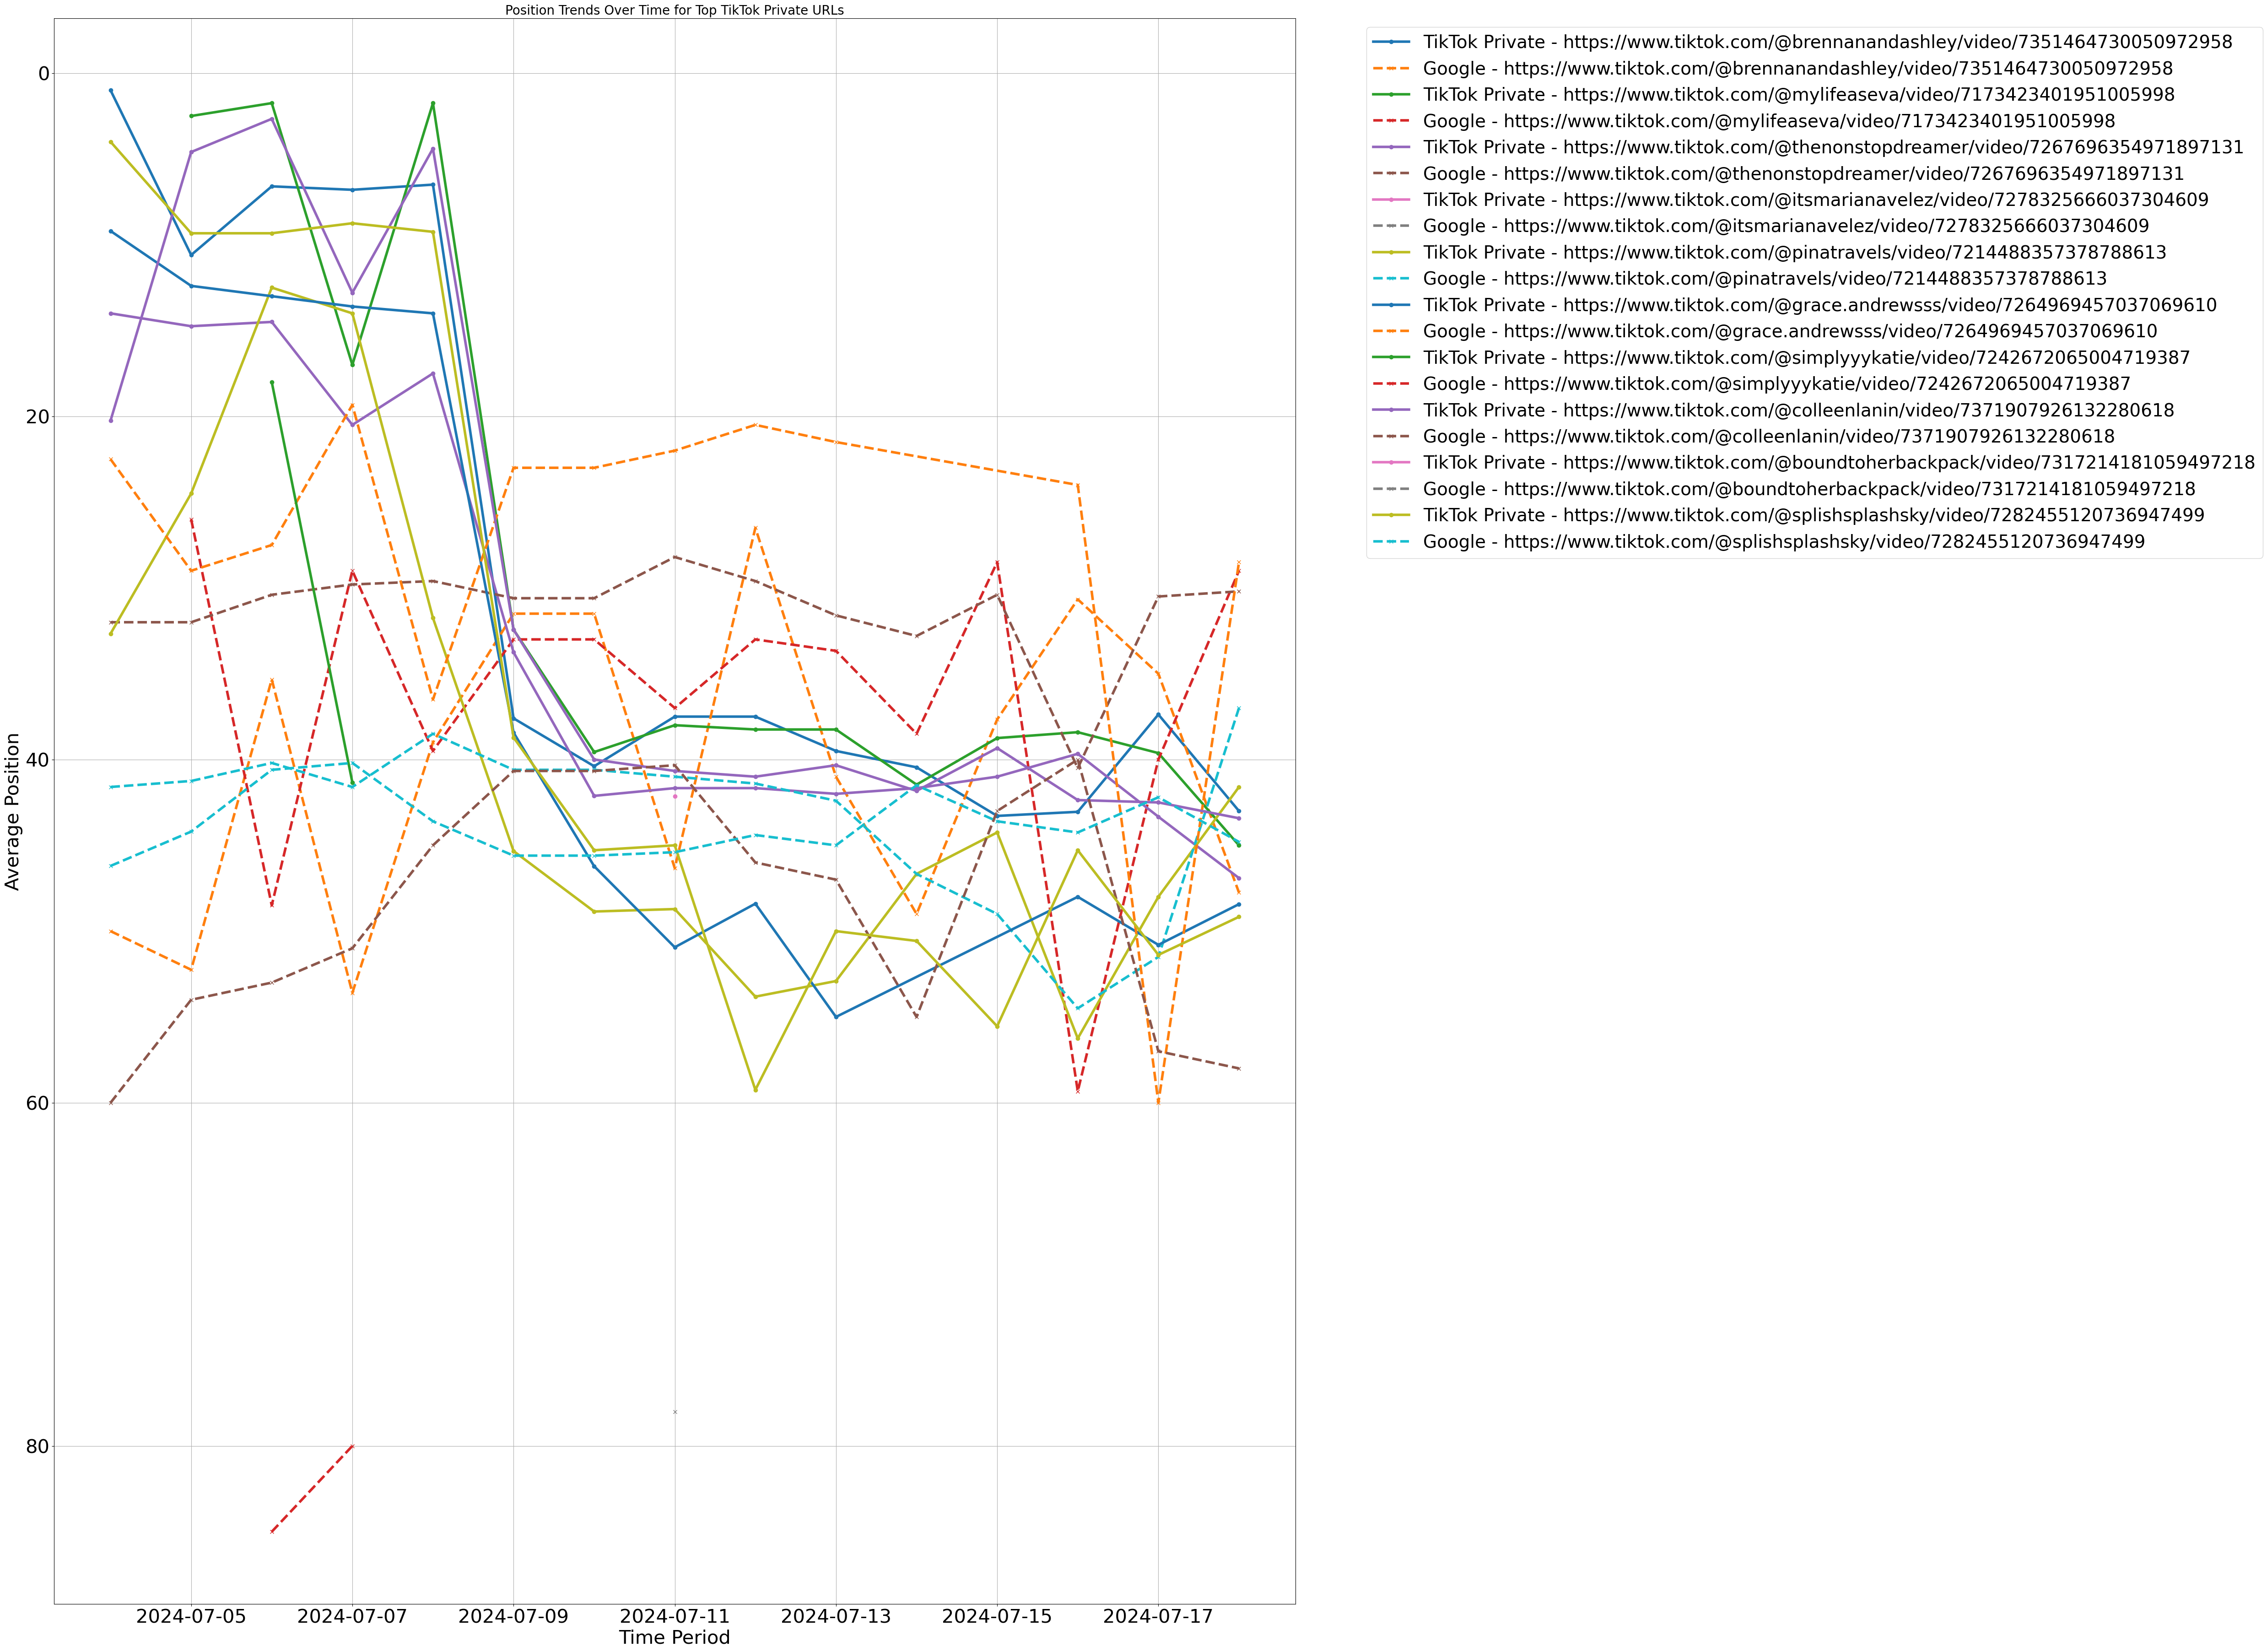

In [156]:
top_10_tiktok_urls = top_20_tiktok_urls.head(10)
#for top 10 TikTok private URLs
plt.figure(figsize=(35, 45))
for url in top_10_tiktok_urls['URL']:
    url_trend = position_trends[position_trends['URL'] == url]
    plt.plot(url_trend['Time_Period'], url_trend['avg_position_tiktok'], marker='o', linestyle='-',linewidth=4, label=f'TikTok Private - {url}')
    plt.plot(url_trend['Time_Period'], url_trend['avg_position_google'], marker='x', linestyle='--',linewidth=4, label=f'Google - {url}')

plt.gca().invert_yaxis()  # Invert y-axis
plt.title('Position Trends Over Time for Top TikTok Private URLs',fontsize=20)
plt.xlabel('Time Period',fontsize=30)
plt.ylabel('Average Position',fontsize=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',fontsize=28)
plt.grid(True)
plt.show()



## Separating the above graphs

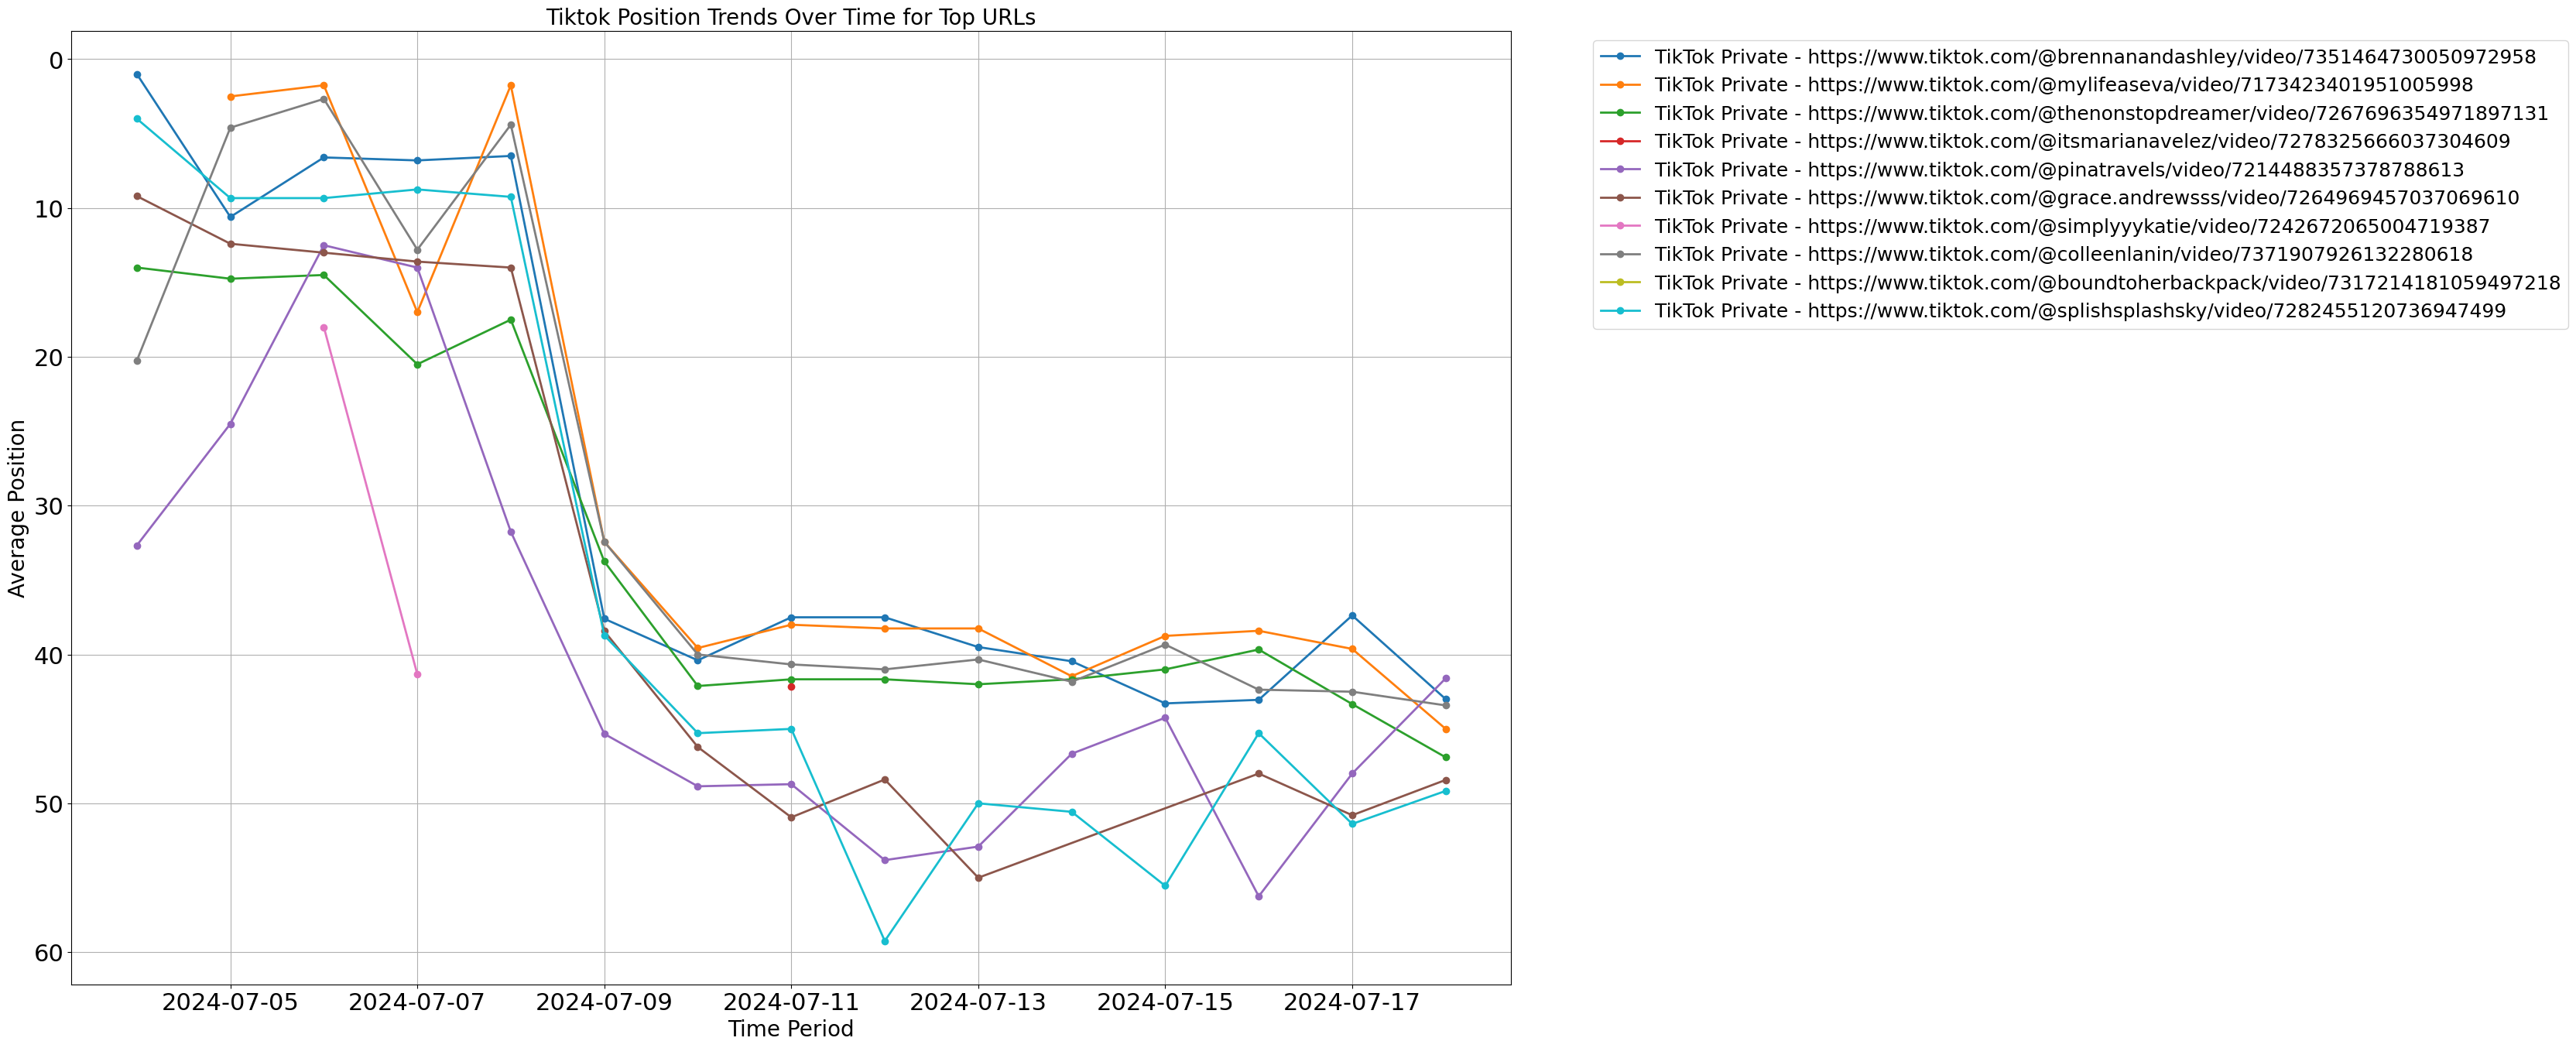

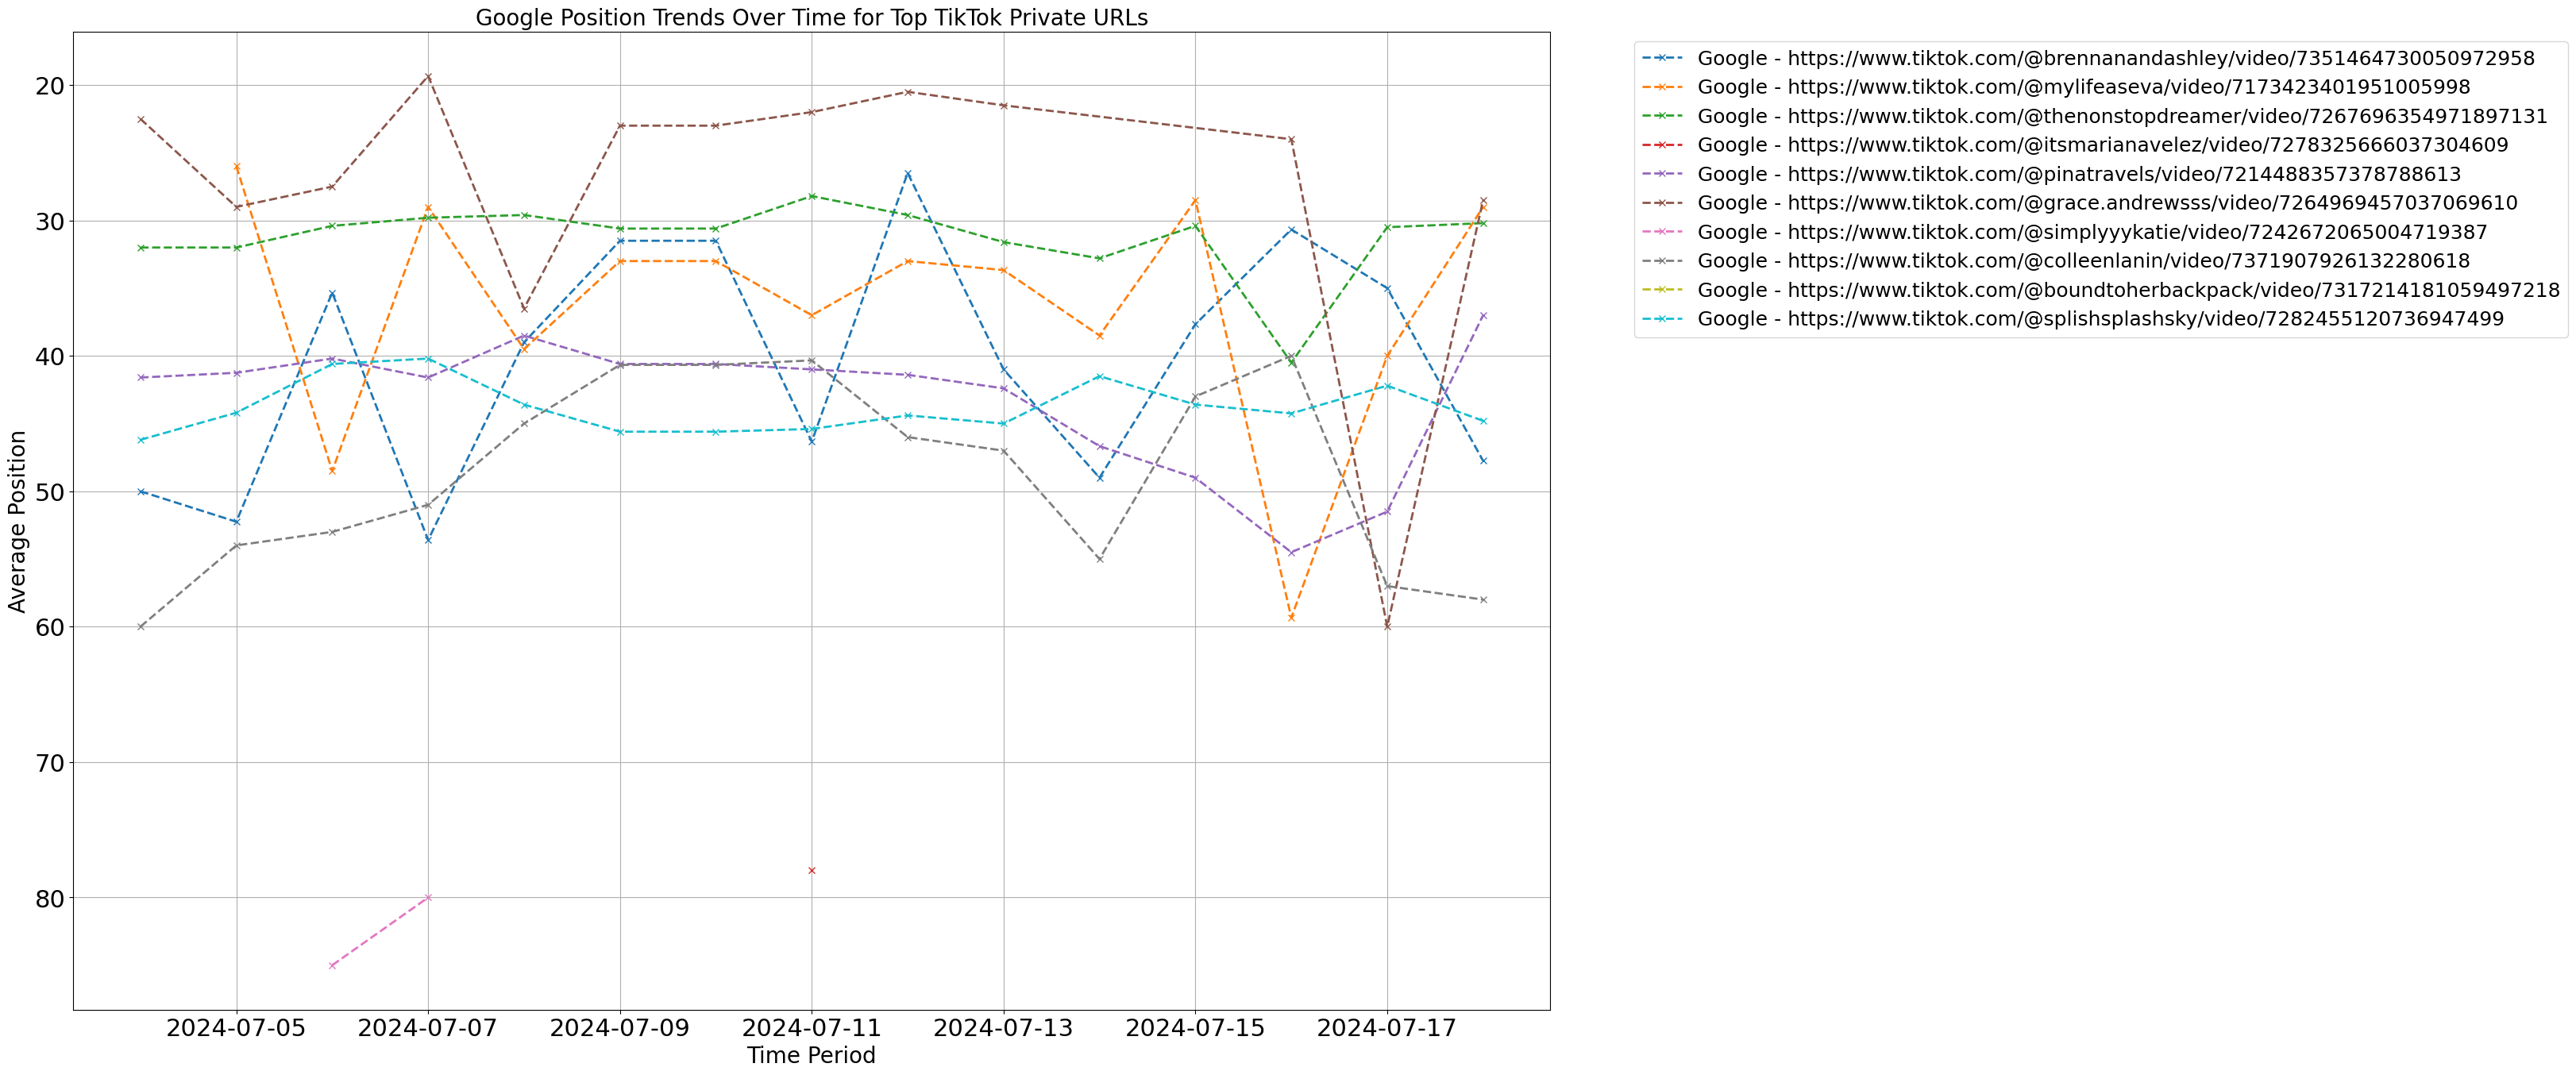

In [136]:
top_10_tiktok_urls = top_20_tiktok_urls.head(10)
#for top 10 TikTok private URLs
plt.figure(figsize=(24, 16))
for url in top_10_tiktok_urls['URL']:
    url_trend = position_trends[position_trends['URL'] == url]
    plt.plot(url_trend['Time_Period'], url_trend['avg_position_tiktok'], marker='o', linestyle='-',linewidth=2, label=f'TikTok Private - {url}')

plt.gca().invert_yaxis()  # Invert y-axis
plt.title('Tiktok Position Trends Over Time for Top URLs',fontsize=20)
plt.xlabel('Time Period',fontsize=20)
plt.ylabel('Average Position',fontsize=20)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',fontsize=18)
plt.grid(True)
plt.show()

plt.figure(figsize=(24, 16))
for url in top_10_tiktok_urls['URL']:
    url_trend = position_trends[position_trends['URL'] == url]
    plt.plot(url_trend['Time_Period'], url_trend['avg_position_google'], marker='x', linestyle='--',linewidth=2, label=f'Google - {url}')

plt.gca().invert_yaxis()  # Invert y-axis
plt.title('Google Position Trends Over Time for Top TikTok Private URLs',fontsize=20)
plt.xlabel('Time Period',fontsize=20)
plt.ylabel('Average Position',fontsize=20)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',fontsize=18)
plt.grid(True)
plt.show()




In [137]:
tiktok_unique_urls = tiktok_private_results.drop_duplicates(subset=['URL', 'Time_Period'])

In [138]:
merged_URL_positon = pd.merge(
    tiktok_unique_urls[['URL', 'Time_Period']],
    google_search_results[['URL', 'Time_Period']],
    on='URL',
    suffixes=('_tiktok', '_google'),
    how='left'
)
merged_URL_positon.head()

URL Time_Period_tiktok  \
0  https://www.tiktok.com/@brennanandashley/video...         2024-07-18   
1  https://www.tiktok.com/@brennanandashley/video...         2024-07-18   
2  https://www.tiktok.com/@brennanandashley/video...         2024-07-18   
3  https://www.tiktok.com/@brennanandashley/video...         2024-07-18   
4  https://www.tiktok.com/@brennanandashley/video...         2024-07-18   

  Time_Period_google  
0         2024-07-04  
1         2024-07-04  
2         2024-07-04  
3         2024-07-04  
4         2024-07-05

In [139]:
filtered_data=merged_URL_positon[(merged_URL_positon['Time_Period_google'].isna()) | 
                                (merged_URL_positon['Time_Period_google']> merged_URL_positon['Time_Period_tiktok'])]

In [114]:
google_search_results.head()

Keyword  Position                                              Title  \
0    trtl         1                 Trtl Travel (@trtltravel) Official   
1    trtl         2                                        Trtl Pillow   
2    trtl         3  trtltravelpillow is scientifically proven to k...   
3    trtl         4                                   trtltravelpillow   
4    trtl         5                                 Trtl Pillow Review   

                                                 URL Account_Type Time_Period  
0                 https://www.tiktok.com/@trtltravel       Google  2024-07-04  
1        https://www.tiktok.com/discover/trtl-pillow       Google  2024-07-04  
2  https://www.tiktok.com/@raz_856/video/73859117...       Google  2024-07-04  
3  https://www.tiktok.com/discover/Trtl-travel-pi...       Google  2024-07-04  
4  https://www.tiktok.com/discover/trtl-pillow-re...       Google  2024-07-04

In [115]:
tiktok_search_results.head()

Keyword                                      Search_Result  Position  \
0    trtl  0: "https://www.tiktok.com/@brennanandashley/v...         1   
1    trtl  1: "https://www.tiktok.com/@mylifeaseva/video/...         2   
2    trtl  2: "https://www.tiktok.com/@colleenlanin/video...         3   
3    trtl  3: "https://www.tiktok.com/@itsmarianavelez/vi...         4   
4    trtl  4: "https://www.tiktok.com/@trtltravel/video/7...         5   

                                                 URL Account_Type Time_Period  
0  https://www.tiktok.com/@brennanandashley/video...      Private  2024-07-18  
1  https://www.tiktok.com/@mylifeaseva/video/7173...      Private  2024-07-18  
2  https://www.tiktok.com/@colleenlanin/video/737...      Private  2024-07-18  
3  https://www.tiktok.com/@itsmarianavelez/video/...      Private  2024-07-18  
4  https://www.tiktok.com/@trtltravel/video/71621...      Private  2024-07-18

In [116]:
google_search_results['Keyword']=google_search_results['Keyword'].str.strip().str.lower()
tiktok_search_results['Keyword']=tiktok_search_results['Keyword'].str.strip().str.lower()

google_keyword=google_search_results['Keyword'].unique()
tiktok_keyword=tiktok_search_results['Keyword'].unique()
common_keywords=set(google_keyword).intersection(set(tiktok_keyword))

common_urls=pd.merge(
    google_search_results[['Position','URL']],
    tiktok_search_results[['Position','URL']],
    on='URL',
    suffixes=('_google','_tiktok')
)

google_summary=google_search_results.describe()
tiktok_summary=tiktok_search_results.describe()
common_keywords,common_urls.head(),google_summary,tiktok_summary

({'trtl', 'trtl pillow', 'trtlneckpillow', 'trtltravel', 'trtltravelpillow'},
    Position_google                                                URL  \
 0               12  https://www.tiktok.com/@gracieoconnnor/video/7...   
 1               12  https://www.tiktok.com/@gracieoconnnor/video/7...   
 2               12  https://www.tiktok.com/@gracieoconnnor/video/7...   
 3               12  https://www.tiktok.com/@gracieoconnnor/video/7...   
 4               12  https://www.tiktok.com/@gracieoconnnor/video/7...   
 
    Position_tiktok  
 0               52  
 1               76  
 2                9  
 3               33  
 4               57  ,
           Position
 count  7425.000000
 mean     50.000000
 std      28.579305
 min       1.000000
 25%      25.000000
 50%      50.000000
 75%      75.000000
 max      99.000000,
            Position
 count  14850.000000
 mean      50.000000
 std       28.578343
 min        1.000000
 25%       25.000000
 50%       50.000000
 75%       75.0

#### Correlation of URLs position between Google and Tiktok Over Time ####

In [140]:
google_search_results['Time_Period']=pd.to_datetime(google_search_results['Time_Period'],format='%d/%m/%Y')
tiktok_search_results['Time_Period']=pd.to_datetime(tiktok_search_results['Time_Period'],format='%d/%m/%Y')
#average of each URL
google_time_trends=google_search_results.groupby(['Time_Period','URL']).agg({'Position':'mean'}).reset_index()
tiktok_time_trends=tiktok_search_results.groupby(['Time_Period','URL']).agg({'Position':'mean'}).reset_index()
common_urls_trends=pd.merge(
    google_time_trends,
    tiktok_time_trends,
    left_on=['Time_Period','URL'],
    right_on=['Time_Period','URL'],
    suffixes=('_google','_tiktok')
)
common_urls_correlation=common_urls_trends.groupby('URL').apply(
    lambda df:df[['Position_google','Position_tiktok']].corr().iloc[0,1]
).reset_index(name='correlation')
significant_correlation_urls=common_urls_correlation[common_urls_correlation['correlation'].abs()>0.5]
display(significant_correlation_urls)
common_urls_trends.head(),significant_correlation_urls.head()

URL  correlation
1   https://www.tiktok.com/@_withsarah/video/72450...     0.918561
3   https://www.tiktok.com/@aroundtheworldat80/vid...    -1.000000
7   https://www.tiktok.com/@brookemonk_/video/7170...     1.000000
9   https://www.tiktok.com/@cassienazz/video/73637...     1.000000
14  https://www.tiktok.com/@elenatea_/video/723665...     0.552009
15  https://www.tiktok.com/@evelynstravelzone/vide...    -1.000000
16  https://www.tiktok.com/@feedmemelanie/video/72...    -0.555888
17  https://www.tiktok.com/@freakinreviews/video/7...     1.000000
21  https://www.tiktok.com/@gracieoconnnor/video/7...    -0.633975
22  https://www.tiktok.com/@gracieoconnnor/video/7...    -0.790943
24  https://www.tiktok.com/@jadenversluis/video/73...     0.851361
26  https://www.tiktok.com/@kaitlinrosew/video/722...     1.000000
39  https://www.tiktok.com/@nalae.co/video/7278438...    -0.847271
44  https://www.tiktok.com/@pilotchezka/video/7041...    -1.000000
48  https://www.tiktok.com/@rominagafur/video/6805...    -0.853013
57  https://www.tiktok.com/@splishsplashsky/video/...     0.674500
58  https://www.tiktok.com/@splishsplashsky/video/...    -0.809639
65  https://www.tiktok.com/@stillatonik/video/7315...    -1.000000
66  https://www.tiktok.com/@thejunglebadger/video/...     0.633373
70  https://www.tiktok.com/@travelandleisuremag/vi...    -0.881467
72  https://www.tiktok.com/@travelwithliana/video/...     0.753821
80  https://www.tiktok.com/@trtltravel/video/72697...    -0.842782
81  https://www.tiktok.com/@trtltravel/video/72857...     0.648288
82  https://www.tiktok.com/@trtltravel/video/73217...    -1.000000
84  https://www.tiktok.com/@trtltravel/video/73863...     0.654026
85  https://www.tiktok.com/@trtltravel/video/73870...     0.652629
86  https://www.tiktok.com/@trtltravel/video/73882...     0.606697
89  https://www.tiktok.com/@wesleychatellier/video...    -0.999226
90  https://www.tiktok.com/@yanimacute/video/72994...     0.753599

(  Time_Period                                                URL  \
 0  2024-07-04  https://www.tiktok.com/@_withsarah/video/72450...   
 1  2024-07-04  https://www.tiktok.com/@alyssaandthecity/video...   
 2  2024-07-04  https://www.tiktok.com/@brennanandashley/video...   
 3  2024-07-04  https://www.tiktok.com/@cassienazz/video/73637...   
 4  2024-07-04  https://www.tiktok.com/@colleenlanin/video/737...   
 
    Position_google  Position_tiktok  
 0            13.25           22.375  
 1            65.25           91.000  
 2            50.00            1.000  
 3            94.00           42.000  
 4            60.00           12.000  ,
                                                   URL  correlation
 1   https://www.tiktok.com/@_withsarah/video/72450...     0.918561
 3   https://www.tiktok.com/@aroundtheworldat80/vid...    -1.000000
 7   https://www.tiktok.com/@brookemonk_/video/7170...     1.000000
 9   https://www.tiktok.com/@cassienazz/video/73637...     1.000000
 14  http

### Frequency of URLs in Tiktok ###

In [141]:
#Most frequent URLS
tiktok_private_url_counts=tiktok_private_results['URL'].value_counts().reset_index()
tiktok_private_url_counts.columns=['URL','Frequency']
#Occurance of each URL
most_frequent_private_urls=tiktok_private_url_counts.head(10)
print(most_frequent_private_urls)

                                                 URL  Frequency
0  https://www.tiktok.com/@mylifeaseva/video/7173...        243
1  https://www.tiktok.com/@itsmarianavelez/video/...        230
2  https://www.tiktok.com/@brennanandashley/video...        225
3  https://www.tiktok.com/@colleenlanin/video/737...        211
4  https://www.tiktok.com/@galaezra/video/7101184...        200
5  https://www.tiktok.com/@gracieoconnnor/video/7...        198
6  https://www.tiktok.com/@_withsarah/video/72450...        184
7  https://www.tiktok.com/@thenonstopdreamer/vide...        178
8  https://www.tiktok.com/@splishsplashsky/video/...        176
9  https://www.tiktok.com/@splishsplashsky/video/...        165


In [119]:
google_positions=google_search_results[['Time_Period','URL','Position']]
tiktok_private_positions=tiktok_search_results[tiktok_search_results['Account_Type']=='Private'][['Time_Period','URL','Position']]
tiktok_private_positions=tiktok_private_positions.rename(columns={'Time_Period':'Time_Period'})
url_position_trends=pd.merge(
    google_positions,
    tiktok_private_positions,
    on=['Time_Period','URL'],
    suffixes=('_google','_tiktok')
)
def plot_position_trend(url,data):
    url_data=data[data['URL']==url]
    '''plt.figure(figsize=(12,6))
    plt.plot(url_data['Time_Period'],url_data['Position_google'],label='Google',marker='o')
    plt.plot(url_data['Time_Period'],url_data['Position_tiktok'],label='Tiktok private',marker='x')
    plt.title(f'Position Trend for URL: {url}')
    plt.xlabel('Time Period')
    plt.ylabel('Position')
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show'''
most_frequent_url=url_position_trends['URL'].mode()[0]
plot_position_trend(most_frequent_url,url_position_trends)
display(url_position_trends)

Time_Period                                                URL  \
0      2024-07-04  https://www.tiktok.com/@gracieoconnnor/video/7...   
1      2024-07-04  https://www.tiktok.com/@gracieoconnnor/video/7...   
2      2024-07-04  https://www.tiktok.com/@gracieoconnnor/video/7...   
3      2024-07-04  https://www.tiktok.com/@gracieoconnnor/video/7...   
4      2024-07-04  https://www.tiktok.com/@gracieoconnnor/video/7...   
...           ...                                                ...   
10525  2024-07-16  https://www.tiktok.com/@_skintobeauty/video/71...   
10526  2024-07-16  https://www.tiktok.com/@_skintobeauty/video/71...   
10527  2024-07-16  https://www.tiktok.com/@_skintobeauty/video/71...   
10528  2024-07-16  https://www.tiktok.com/@evelynstravelzone/vide...   
10529  2024-07-16  https://www.tiktok.com/@evelynstravelzone/vide...   

       Position_google  Position_tiktok  
0                   12                5  
1                    4                5  
2                    4                5  
3                    4                5  
4                    2                5  
...                ...              ...  
10525               70               46  
10526               70               70  
10527               70               94  
10528               77               19  
10529               77               88  

[10530 rows x 4 columns]

In [142]:

# Select columns for merging
google_positions = google_search_results[['Time_Period', 'Keyword', 'URL', 'Position']].reset_index(drop=True)
tiktok_private_positions = tiktok_private_results [['Time_Period', 'Keyword', 'URL', 'Position']].reset_index(drop=True)

# Rename columns for consistency
tiktok_private_positions = tiktok_private_positions.rename(columns={'Time Period': 'Time period'})

display(google_positions)

Time_Period         Keyword  \
0     2024-07-04            trtl   
1     2024-07-04            trtl   
2     2024-07-04            trtl   
3     2024-07-04            trtl   
4     2024-07-04            trtl   
...          ...             ...   
7420  2024-07-16  trtlneckpillow   
7421  2024-07-16  trtlneckpillow   
7422  2024-07-16  trtlneckpillow   
7423  2024-07-16  trtlneckpillow   
7424  2024-07-16  trtlneckpillow   

                                                    URL  Position  
0                    https://www.tiktok.com/@trtltravel         1  
1           https://www.tiktok.com/discover/trtl-pillow         2  
2     https://www.tiktok.com/@raz_856/video/73859117...         3  
3     https://www.tiktok.com/discover/Trtl-travel-pi...         4  
4     https://www.tiktok.com/discover/trtl-pillow-re...         5  
...                                                 ...       ...  
7420  https://www.tiktok.com/discover/travel-pillow-...        95  
7421  https://www.tiktok.com/discover/travel-pillow-...        96  
7422  https://www.tiktok.com/@laurenwaggs/video/7325...        97  
7423  https://www.tiktok.com/@freakinreviews/video/7...        98  
7424  https://www.tiktok.com/@shopgma/video/73540287...        99  

[7425 rows x 4 columns]

### Days difference for URLs Appearing in Google ###

In [143]:
tiktok_private_results=tiktok_search_results[tiktok_search_results['Account_Type']=='Private']
tiktok_unique_urls=tiktok_private_results.groupby('URL')['Time_Period'].min().reset_index()
tiktok_first_appearance=tiktok_private_results.groupby('URL')['Time_Period'].min()
tiktok_unique_urls.columns=['URL','First_Appearance_Tiktok']

#Find the match
google_matching_urls=google_search_results[google_search_results['URL'].isin(tiktok_unique_urls['URL'])]
google_first_appearance=google_matching_urls.groupby('URL')['Time_Period'].min().reset_index()
google_first_appearance.columns=['URL','First_Appearance_Google']

merged_data3=pd.merge(tiktok_unique_urls,google_first_appearance,on='URL',how='inner')
merged_data3['Days_difference']=(merged_data3['First_Appearance_Google']- merged_data3['First_Appearance_Tiktok']).dt.days

filtered_data=merged_data3[merged_data3['Days_difference']>=2]
display(filtered_data)


URL First_Appearance_Tiktok  \
3   https://www.tiktok.com/@adventureswithgi/video...              2024-07-04   
7   https://www.tiktok.com/@brookemonk_/video/7170...              2024-07-04   
8   https://www.tiktok.com/@brynandlu/video/717331...              2024-07-04   
12  https://www.tiktok.com/@danispeaks/video/67978...              2024-07-04   
15  https://www.tiktok.com/@epthelatino/video/7342...              2024-07-13   
19  https://www.tiktok.com/@fromabolivian/video/72...              2024-07-09   
22  https://www.tiktok.com/@gottabemaddy/video/725...              2024-07-05   
26  https://www.tiktok.com/@itsmarianavelez/video/...              2024-07-04   
30  https://www.tiktok.com/@justinparkexe/video/72...              2024-07-04   
32  https://www.tiktok.com/@lanie.mp3/video/731137...              2024-07-04   
35  https://www.tiktok.com/@meganheaton/video/7170...              2024-07-04   
36  https://www.tiktok.com/@meganheaton/video/7249...              2024-07-04   
37  https://www.tiktok.com/@meggomyleggo22/video/7...              2024-07-04   
46  https://www.tiktok.com/@okay.kara.travels/vide...              2024-07-04   
52  https://www.tiktok.com/@rachelhaneats/video/72...              2024-07-04   
57  https://www.tiktok.com/@simplyyykatie/video/72...              2024-07-04   
61  https://www.tiktok.com/@splishsplashsky/video/...              2024-07-04   
67  https://www.tiktok.com/@splishsplashsky/video/...              2024-07-04   
72  https://www.tiktok.com/@suitelifeoflauren/vide...              2024-07-04   
77  https://www.tiktok.com/@travelandleisuremag/vi...              2024-07-04   
78  https://www.tiktok.com/@travelbybrenna/video/7...              2024-07-04   
79  https://www.tiktok.com/@travelwithliana/video/...              2024-07-04   
81  https://www.tiktok.com/@trtltravel/video/70479...              2024-07-05   
92  https://www.tiktok.com/@trtltravel/video/73882...              2024-07-05   

   First_Appearance_Google  Days_difference  
3               2024-07-11                7  
7               2024-07-06                2  
8               2024-07-08                4  
12              2024-07-08                4  
15              2024-07-18                5  
19              2024-07-11                2  
22              2024-07-11                6  
26              2024-07-11                7  
30              2024-07-16               12  
32              2024-07-08                4  
35              2024-07-08                4  
36              2024-07-08                4  
37              2024-07-06                2  
46              2024-07-18               14  
52              2024-07-06                2  
57              2024-07-06                2  
61              2024-07-15               11  
67              2024-07-09                5  
72              2024-07-17               13  
77              2024-07-06                2  
78              2024-07-06                2  
79              2024-07-06                2  
81              2024-07-07                2  
92              2024-07-09                4

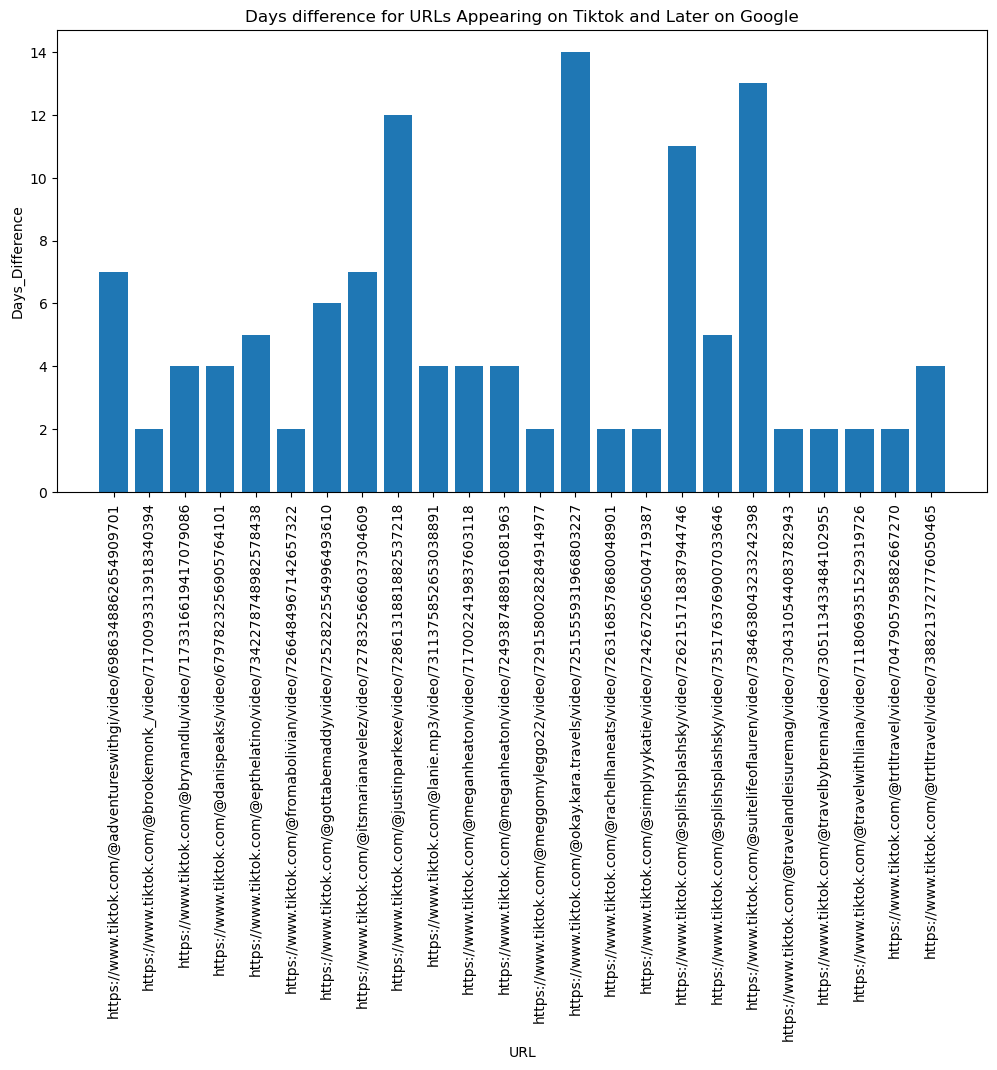

In [144]:
plt.figure(figsize=(12,6))
plt.bar(filtered_data['URL'],filtered_data['Days_difference'])
plt.title('Days difference for URLs Appearing on Tiktok and Later on Google')
plt.xlabel('URL')
plt.ylabel('Days_Difference')
plt.xticks(rotation=90)
plt.show()

In [123]:
#Considering the top5 google & tiktok position chnage over time
google_avg_positions=google_search_results.groupby('URL')['Position'].mean().reset_index()
tiktok_avg_positions=tiktok_private_results.groupby('URL')['Position'].mean().reset_index()

top_5_google_urls=google_avg_positions.sort_values(by='Position').head(5)['URL']
top_5_tiktok_urls=tiktok_avg_positions.sort_values(by='Position').head(5)['URL']


#### Top 30 Tiktok URLS for further Analysis ###

In [124]:
tiktok_private_results=tiktok_search_results[tiktok_search_results['Account_Type'] =='Private']
top_30_tiktok_urls =tiktok_private_results.sort_values(by='Position').drop_duplicates(subset='URL').head(50).reset_index()
top_30_google_urls =google_search_results.sort_values(by='Position').drop_duplicates(subset='URL').head(50).reset_index()
top_urls=pd.concat([top_20_tiktok_urls[['URL']],top_20_google_urls[['URL']]]).drop_duplicates().reset_index(drop=True)

# top 30 unique URLs with position
display(top_30_tiktok_urls[['URL', 'Position']])


URL  Position
0   https://www.tiktok.com/@brennanandashley/video...         1
1   https://www.tiktok.com/@mylifeaseva/video/7173...         1
2   https://www.tiktok.com/@thenonstopdreamer/vide...         1
3   https://www.tiktok.com/@itsmarianavelez/video/...         1
4   https://www.tiktok.com/@pinatravels/video/7214...         1
5   https://www.tiktok.com/@grace.andrewsss/video/...         1
6   https://www.tiktok.com/@simplyyykatie/video/72...         1
7   https://www.tiktok.com/@colleenlanin/video/737...         1
8   https://www.tiktok.com/@boundtoherbackpack/vid...         1
9   https://www.tiktok.com/@splishsplashsky/video/...         2
10  https://www.tiktok.com/@_withsarah/video/72450...         2
11  https://www.tiktok.com/@trtltravel/video/73863...         2
12  https://www.tiktok.com/@nhonsworld/video/71901...         2
13  https://www.tiktok.com/@feedmemelanie/video/72...         2
14  https://www.tiktok.com/@brookemonk_/video/7170...         2
15  https://www.tiktok.com/@gracieoconnnor/video/7...         2
16  https://www.tiktok.com/@trtltravel/video/71621...         3
17  https://www.tiktok.com/@galaezra/video/7101184...         3
18  https://www.tiktok.com/@splishsplashsky/video/...         3
19  https://www.tiktok.com/@somedayfiles/video/698...         3
20  https://www.tiktok.com/@travelwithliana/video/...         3
21  https://www.tiktok.com/@lucymooreee_/video/723...         3
22  https://www.tiktok.com/@trtltravel/video/73882...         3
23  https://www.tiktok.com/@ralph__travels/video/7...         4
24  https://www.tiktok.com/@trtltravel/video/71763...         4
25  https://www.tiktok.com/@trtltravel/video/73269...         4
26  https://www.tiktok.com/@trtltravel/video/73826...         4
27  https://www.tiktok.com/@splishsplashsky/video/...         4
28  https://www.tiktok.com/@trtltravel/video/70682...         4
29  https://www.tiktok.com/@evelynstravelzone/vide...         4
30  https://www.tiktok.com/@stellaandariella/video...         4
31  https://www.tiktok.com/@niredonahue/video/7256...         5
32  https://www.tiktok.com/@sophia.madalena/video/...         5
33  https://www.tiktok.com/@splishsplashsky/video/...         5
34  https://www.tiktok.com/@trtltravel/video/73069...         5
35  https://www.tiktok.com/@sophia.madalena/video/...         5
36  https://www.tiktok.com/@holaluisaa/video/73420...         6
37  https://www.tiktok.com/@trtltravel/video/73870...         6
38  https://www.tiktok.com/@simplyyykatie/video/73...         6
39  https://www.tiktok.com/@splishsplashsky/video/...         6
40  https://www.tiktok.com/@dominiquetravels/video...         6
41  https://www.tiktok.com/@trtltravel/video/71788...         7
42  https://www.tiktok.com/@trtltravel/video/72712...         7
43  https://www.tiktok.com/@splishsplashsky/video/...         7
44  https://www.tiktok.com/@_skintobeauty/video/71...         7
45  https://www.tiktok.com/@abbiesadventures_/vide...         7
46  https://www.tiktok.com/@trtltravel/video/72942...         7
47  https://www.tiktok.com/@splishsplashsky/video/...         8
48  https://www.tiktok.com/@yanimacute/video/72994...         8
49  https://www.tiktok.com/@trtltravel/video/73922...         8

In [125]:
csv_file_path='top_30_tiktok_urls.csv'
top_30_tiktok_urls.to_csv(csv_file_path,index=False)
print(f"csv file saved")

csv file saved


## URLs that never appeared on Google

In [153]:
tiktok_public_results = tiktok_search_results[tiktok_search_results['Account_Type'] == 'Public']
tiktok_public_urls = tiktok_public_results['URL'].dropna().unique()
google_urls = google_search_results['URL'].dropna().unique()
unique_tiktok_public_urls = set(tiktok_public_urls) - set(google_urls)
unique_tiktok_public_urls_df = pd.DataFrame(unique_tiktok_public_urls, columns=['TikTok Public URLs Not on Google'])
print("\n'TikTok Public URLs Never appeared on Google")
display(unique_tiktok_public_urls_df)


'TikTok Public URLs Never appeared on Google


TikTok Public URLs Not on Google
0    https://www.tiktok.com/@eleniusification/video...
1    https://www.tiktok.com/@fitbaze/video/70409166...
2    https://www.tiktok.com/@trtltravel/video/72526...
3    https://www.tiktok.com/@trtltravel/video/71777...
4    https://www.tiktok.com/@nitzanah/video/7366901...
..                                                 ...
453  https://www.tiktok.com/@splishsplashsky/video/...
454  https://www.tiktok.com/@kalialexandria/video/7...
455  https://www.tiktok.com/@harriet_coombs/video/7...
456  https://www.tiktok.com/@itstrtl/video/73322085...
457  https://www.tiktok.com/@annabellevictoriax/vid...

[458 rows x 1 columns]